In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms, mV, pA, pF, siemens, amp, second, NeuronGroup, defaultclock, run
from brian2tools import *
import matplotlib.pyplot as plt
import random
import numpy as np
import json

from result import Visualization
from models.AdEx import NeuronModel

import subprocess
from IPython.display import display, Markdown
from simulation_runner import plot_results, run_simulation, load_params

### Modeling Result

Converted parameters: {'g_L': 6.46 * nsiemens, 'vr': -85.4 * mvolt, 'th': -45. * mvolt, 'E_L': -85.4 * mvolt, 'C': 157. * pfarad, 'I': 300. * pamp}


INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

<Figure size 1500x800 with 0 Axes>

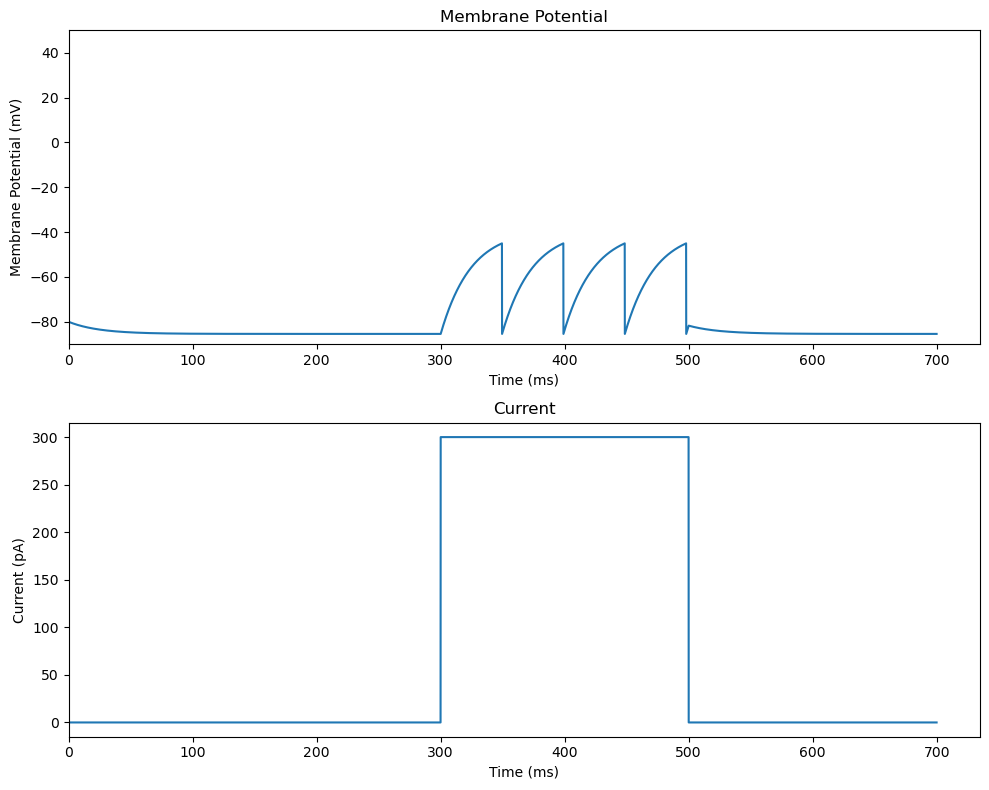

In [2]:
### Leaky Integrate and Fire 
json_file = './params/LIF.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value'] 

# simulation 
results = run_simulation(N, params, model_name)

# visualization
plot_results(results)

### AdEx spontaneous
- set I as 100pA

Converted parameters: {'g_L': 12. * nsiemens, 'E_L': -58. * mvolt, 'Delta_T': 7. * mvolt, 'vt': -58. * mvolt, 'v': -10. * mvolt, 'vr': -70. * mvolt, 'tau_w': 12. * msecond, 'a': 8. * nsiemens, 'd': 3. * pamp, 'C': 115. * pfarad, 'I': 100. * pamp}


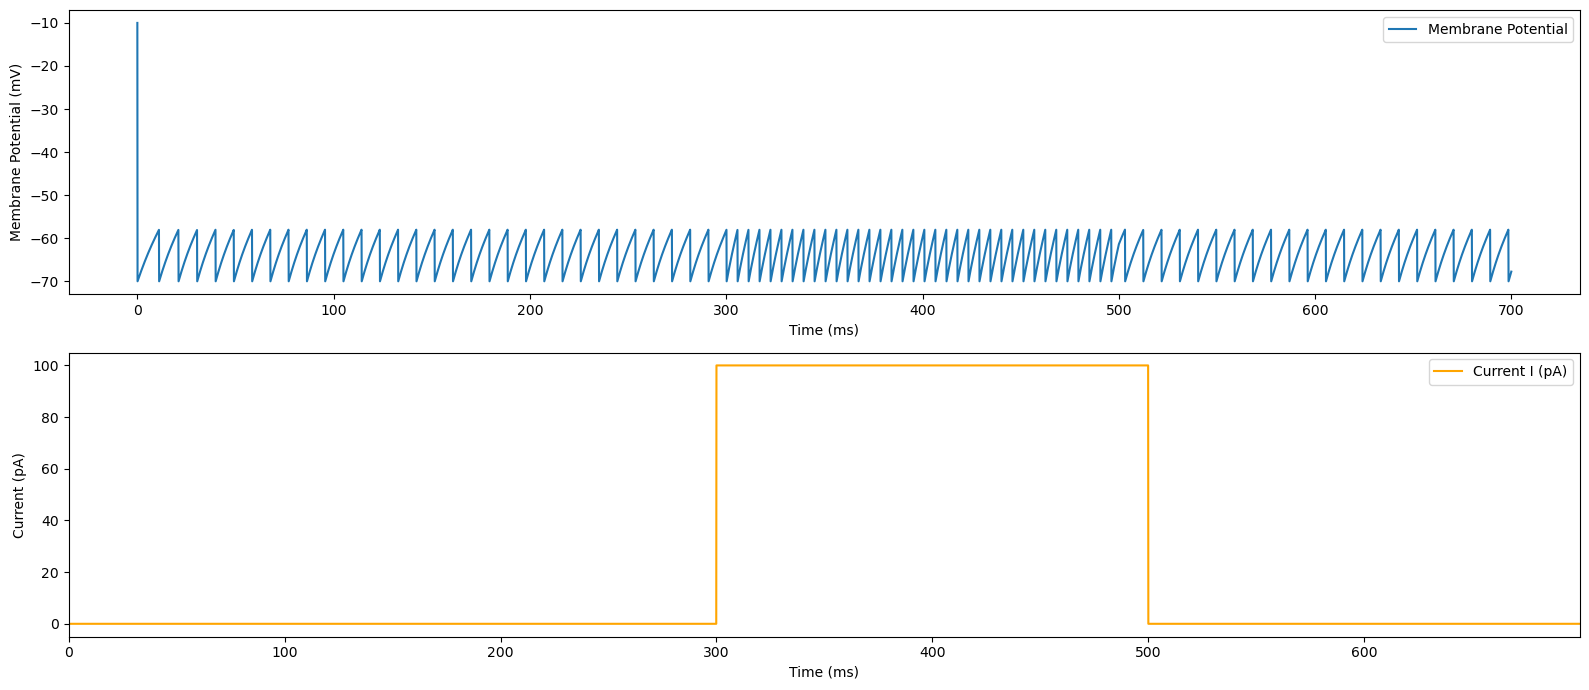

In [ ]:
### Adaptive Exponential Integrate and Fire (v > threshold)
json_file = './AdEx2.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value']  

# simulation 
sim = run_simulation(N, params, model_name)

# visualization
sim.plot_results()

### Monitoring with different I

- 초기 v를 다르게 설정했을때 I가 30pA인경우부터 current onset time 이후 패턴이 차이나는 것을 확인할 수 있음
    - 특히 I가 60pA, 90pA인 경우 차이가 발생함
    - I가 180pA인 경우에 onset time 부분에 튀는 패턴에 차이가 있음

In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms
from brian2tools import *
import matplotlib.pyplot as plt
import random
import numpy as np
import json

from simulation_I import run_simulation, load_params, plot_results

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_6z9g3ryq/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_6z9g3ryq/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_6z9g3ryq/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_6z9g3ryq/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_6z9g3ryq/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_6z9g3ryq/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_6z9g3ryq
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

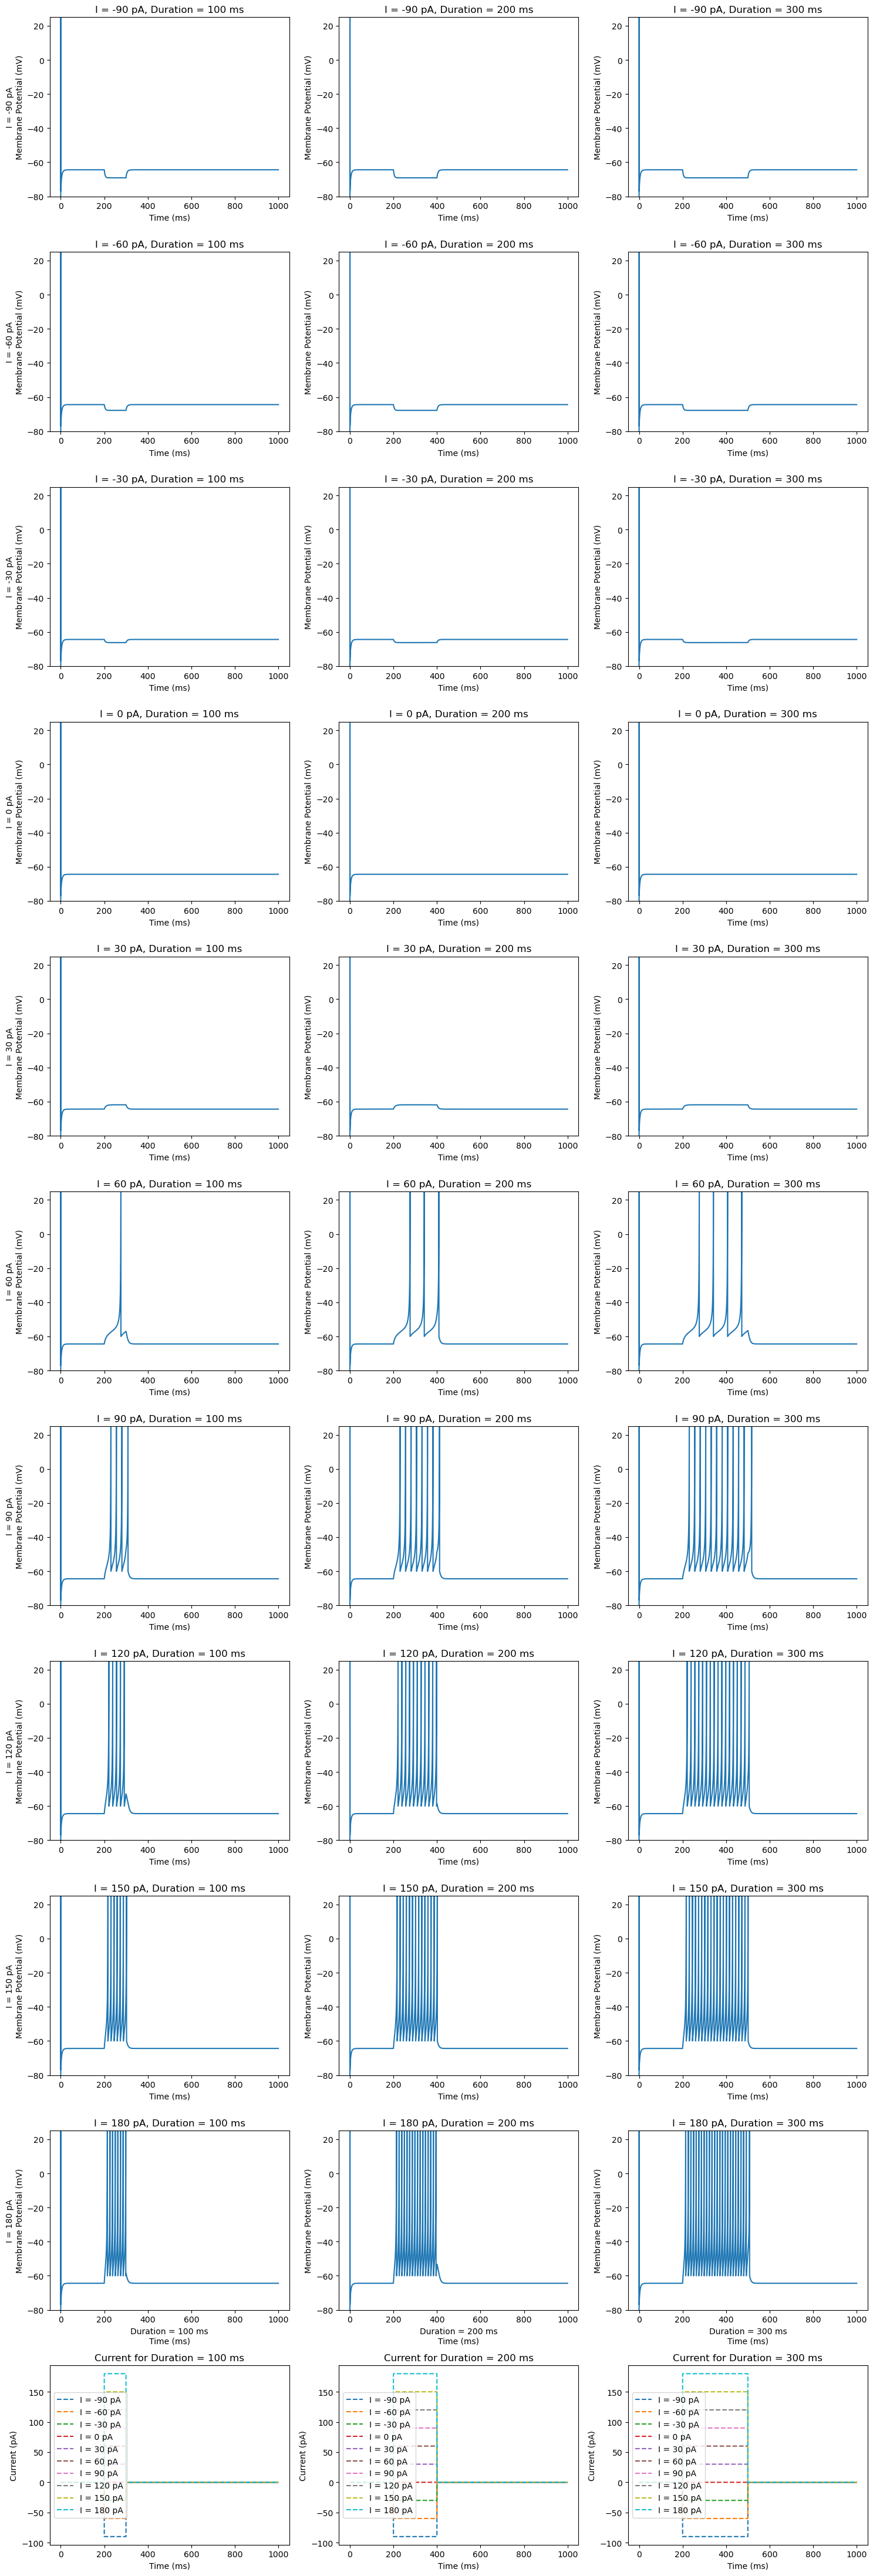

In [2]:
### v: 0mV
json_file = './params_ref/FSN_1.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -60. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 0. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 60. The internal variable will be used. 

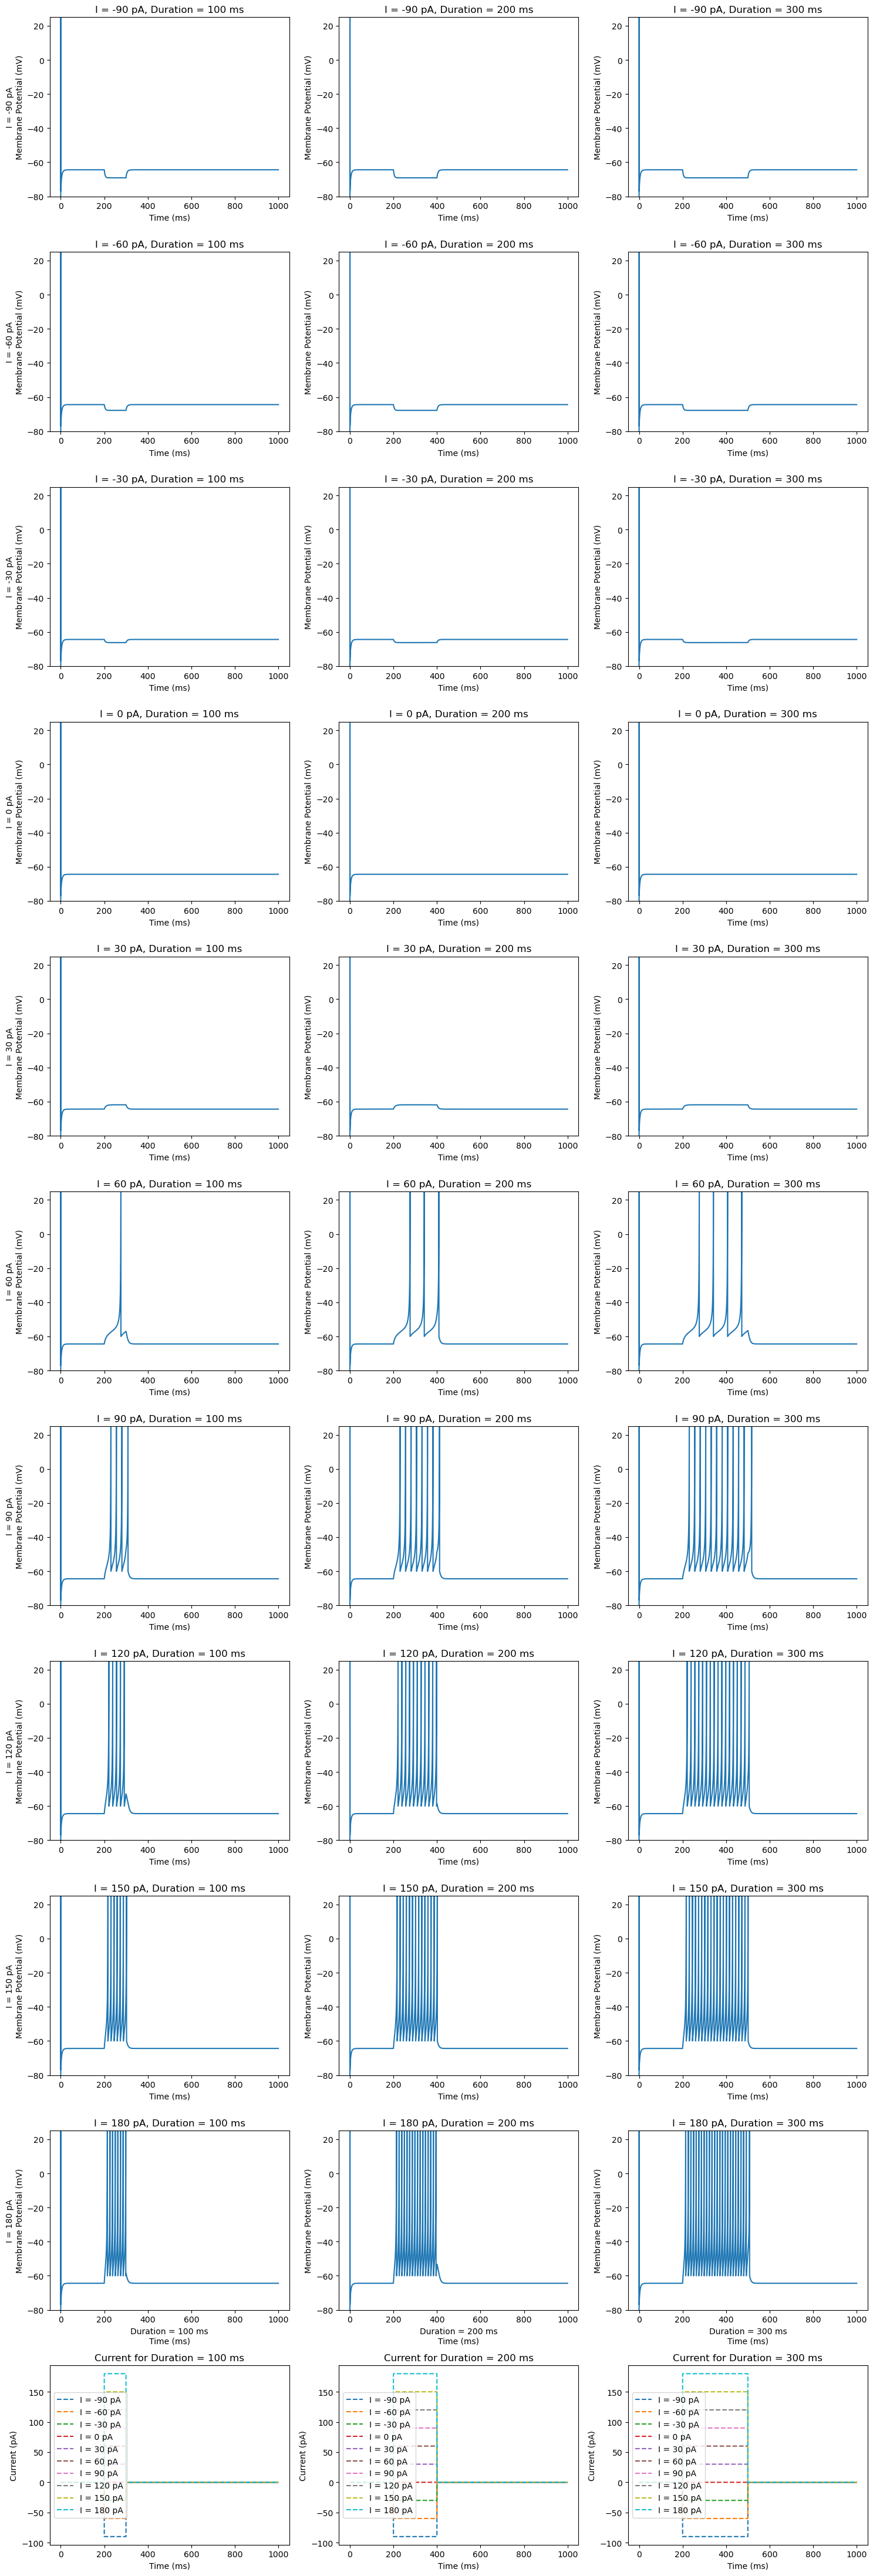

In [3]:
### v: -80mV
json_file = './params_ref/FSN_1.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_17z107he/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_17z107he/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_17z107he/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_17z107he/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_17z107he/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_17z107he/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_17z107he
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

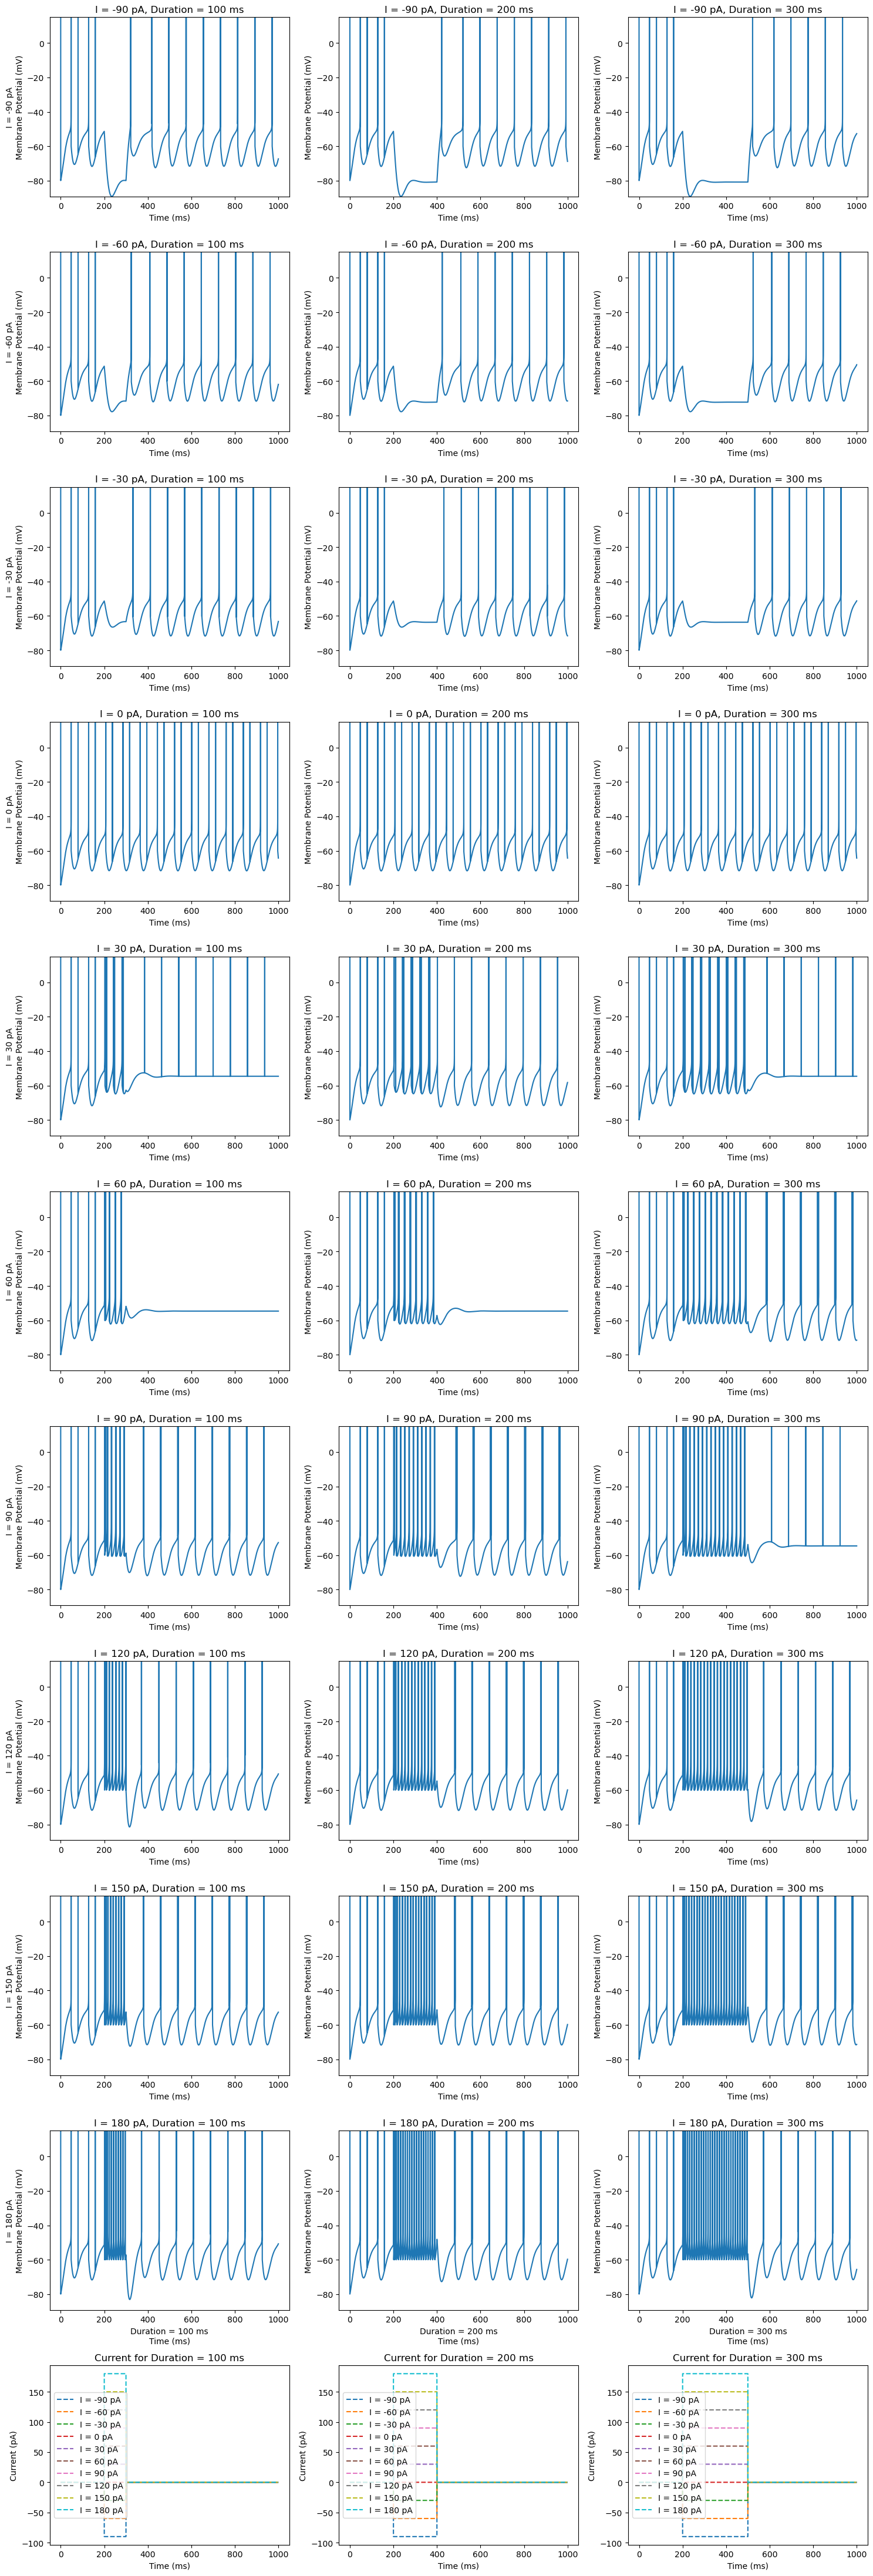

In [2]:
### v: -80mV
json_file = './params_ref/GPe_T1_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']   
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjkrpws9/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjkrpws9/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjkrpws9/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjkrpws9/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjkrpws9/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjkrpws9/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjkrpws9
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

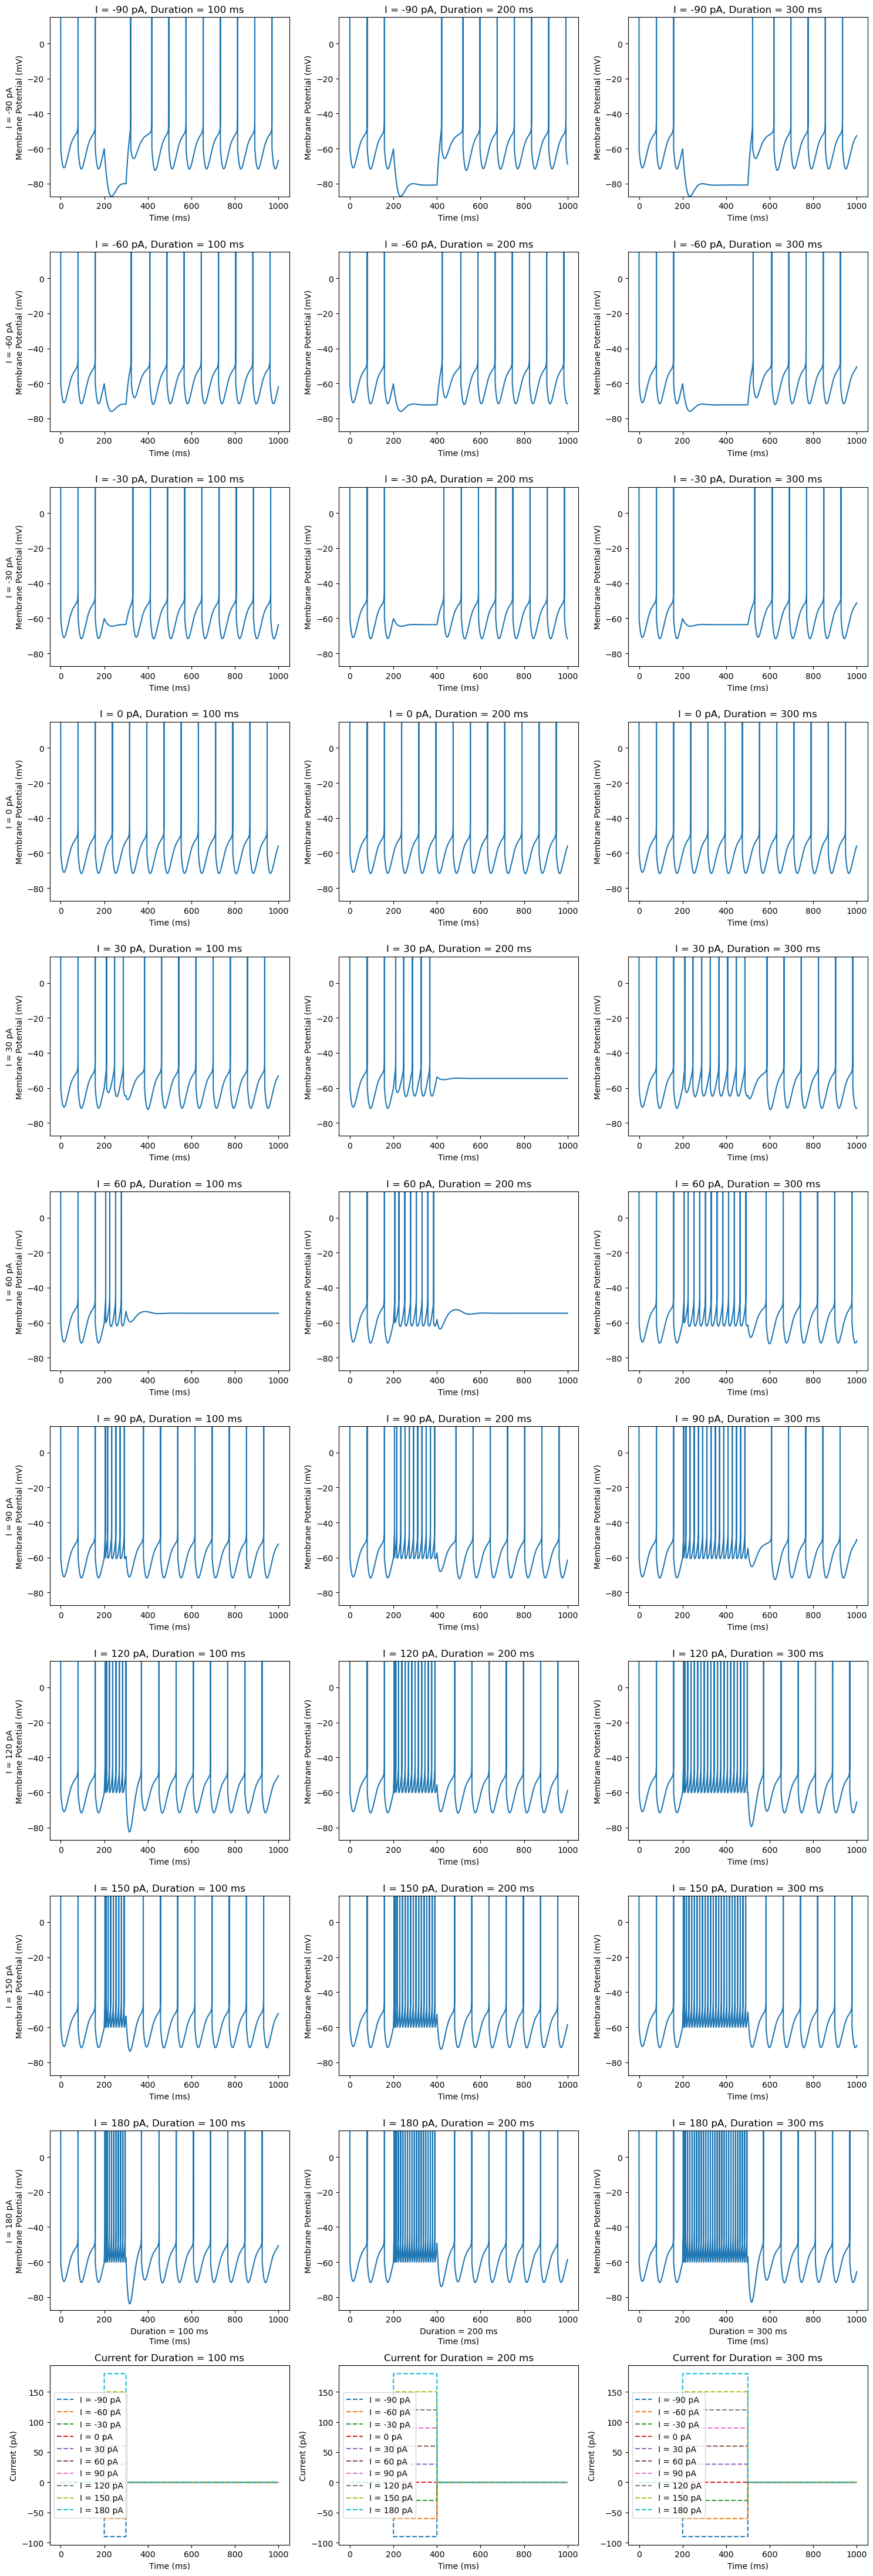

In [2]:
### v: 0mV
json_file = './params_ref/GPe_T1_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 5. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 5. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 15. The internal variable will be use

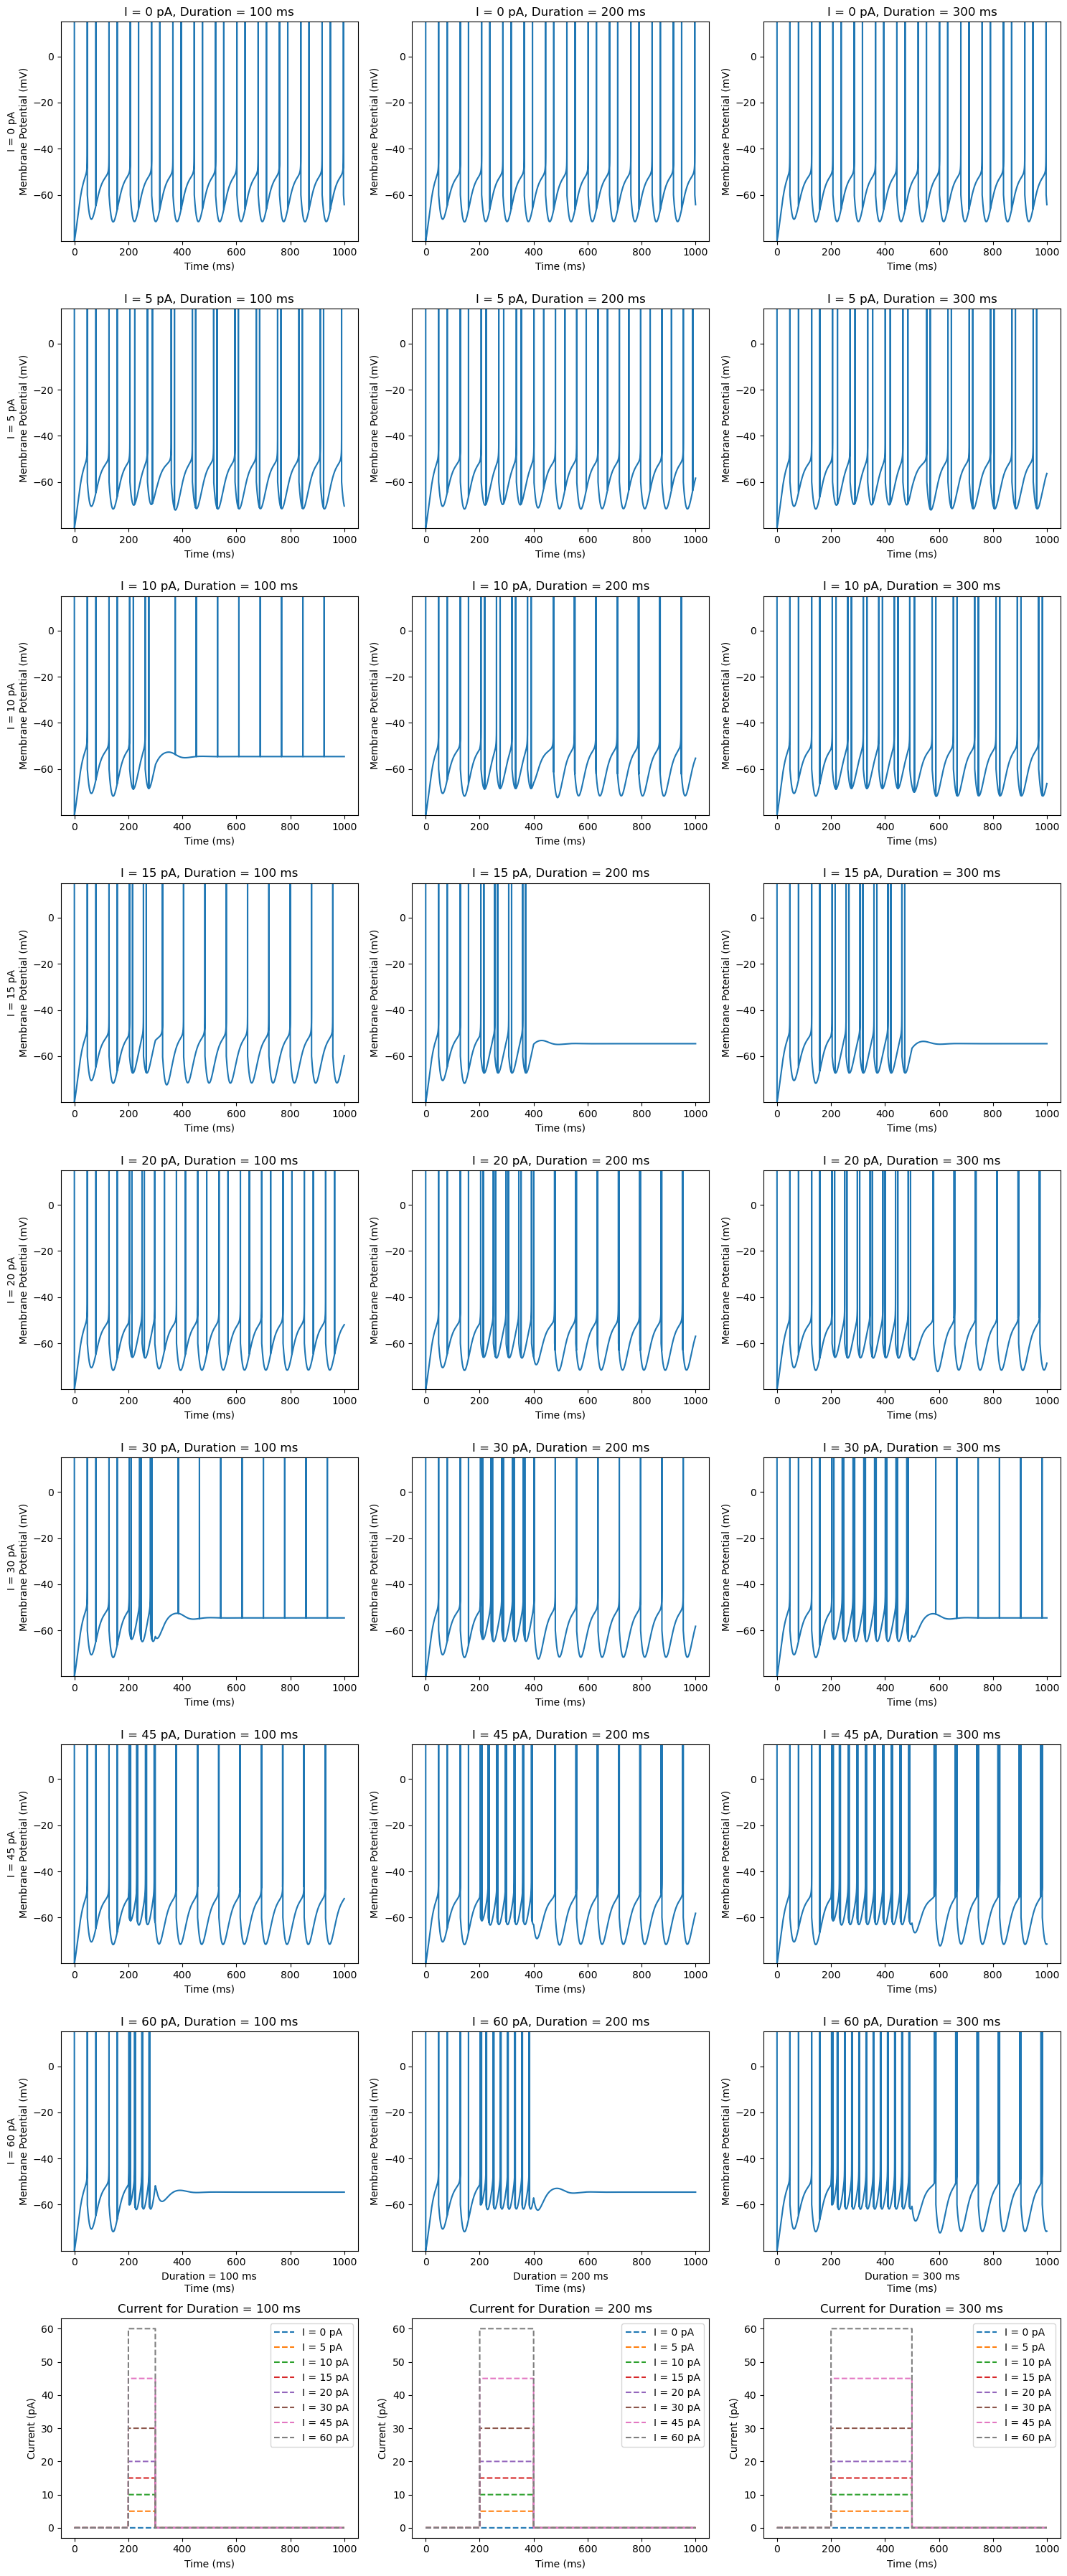

In [4]:
### v: -80mV (with small value I)
json_file = './params_ref/GPe_T1_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']   
I_values = [0, 5, 10, 15, 20, 30, 45, 60]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_gxaa0b37/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_gxaa0b37/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_gxaa0b37/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_gxaa0b37/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_gxaa0b37/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_gxaa0b37/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_gxaa0b37
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

전류 주입 종료 시점의 막전위: -53.23638229736465 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -53.23638229736465 mV, 임계치: -54.7 mV, I: 0. A)
전류 주입 종료 시점의 막전위: -65.89283386647503 mV


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 0. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 5. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -65.89283386647503 mV, 임계치: -54.7 mV, I: 0. A)
전류 주입 종료 시점의 막전위: -68.82623131993292 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -68.82623131993292 mV, 임계치: -54.7 mV, I: 0. A)


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 5. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -69.40026731786355 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -69.40026731786355 mV, 임계치: -54.7 mV, I: 5. pA)
전류 주입 종료 시점의 막전위: -56.39972043661876 mV


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -56.39972043661876 mV, 임계치: -54.7 mV, I: 5. pA)
전류 주입 종료 시점의 막전위: -69.90166167555347 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -69.90166167555347 mV, 임계치: -54.7 mV, I: 5. pA)


WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -65.47146312353581 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -65.47146312353581 mV, 임계치: -54.7 mV, I: 10. pA)
전류 주입 종료 시점의 막전위: -67.76323130067631 mV


WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 15. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -67.76323130067631 mV, 임계치: -54.7 mV, I: 10. pA)
전류 주입 종료 시점의 막전위: -51.88881696456685 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -51.88881696456685 mV, 임계치: -54.7 mV, I: 10. pA)


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 15. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -58.67426141059332 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -58.67426141059332 mV, 임계치: -54.7 mV, I: 15. pA)
전류 주입 종료 시점의 막전위: -60.55434785870142 mV


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 20. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -60.55434785870142 mV, 임계치: -54.7 mV, I: 15. pA)
전류 주입 종료 시점의 막전위: -62.456774022221474 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -62.456774022221474 mV, 임계치: -54.7 mV, I: 15. pA)


WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 20. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -52.815620555474005 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -52.815620555474005 mV, 임계치: -54.7 mV, I: 20. pA)
전류 주입 종료 시점의 막전위: -46.92279624593183 mV


WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -46.92279624593183 mV, 임계치: -54.7 mV, I: 20. pA)
전류 주입 종료 시점의 막전위: -64.56600287750769 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -64.56600287750769 mV, 임계치: -54.7 mV, I: 20. pA)


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -64.51579843935794 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -64.51579843935794 mV, 임계치: -54.7 mV, I: 30. pA)
전류 주입 종료 시점의 막전위: -53.88231157625844 mV


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 45. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -53.88231157625844 mV, 임계치: -54.7 mV, I: 30. pA)
전류 주입 종료 시점의 막전위: -64.31506138286113 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -64.31506138286113 mV, 임계치: -54.7 mV, I: 30. pA)


WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 45. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -60.57801749215539 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -60.57801749215539 mV, 임계치: -54.7 mV, I: 45. pA)
전류 주입 종료 시점의 막전위: -62.65295795780952 mV


WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 60. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -62.65295795780952 mV, 임계치: -54.7 mV, I: 45. pA)
전류 주입 종료 시점의 막전위: -62.96021104998511 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -62.96021104998511 mV, 임계치: -54.7 mV, I: 45. pA)


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 60. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -53.61405295171788 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -53.61405295171788 mV, 임계치: -54.7 mV, I: 60. pA)
전류 주입 종료 시점의 막전위: -58.25676858505443 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -58.25676858505443 mV, 임계치: -54.7 mV, I: 60. pA)
전류 주입 종료 시점의 막전위: -61.318491687982394 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -61.318491687982394 mV, 임계치: -54.7 mV, I: 60. pA)


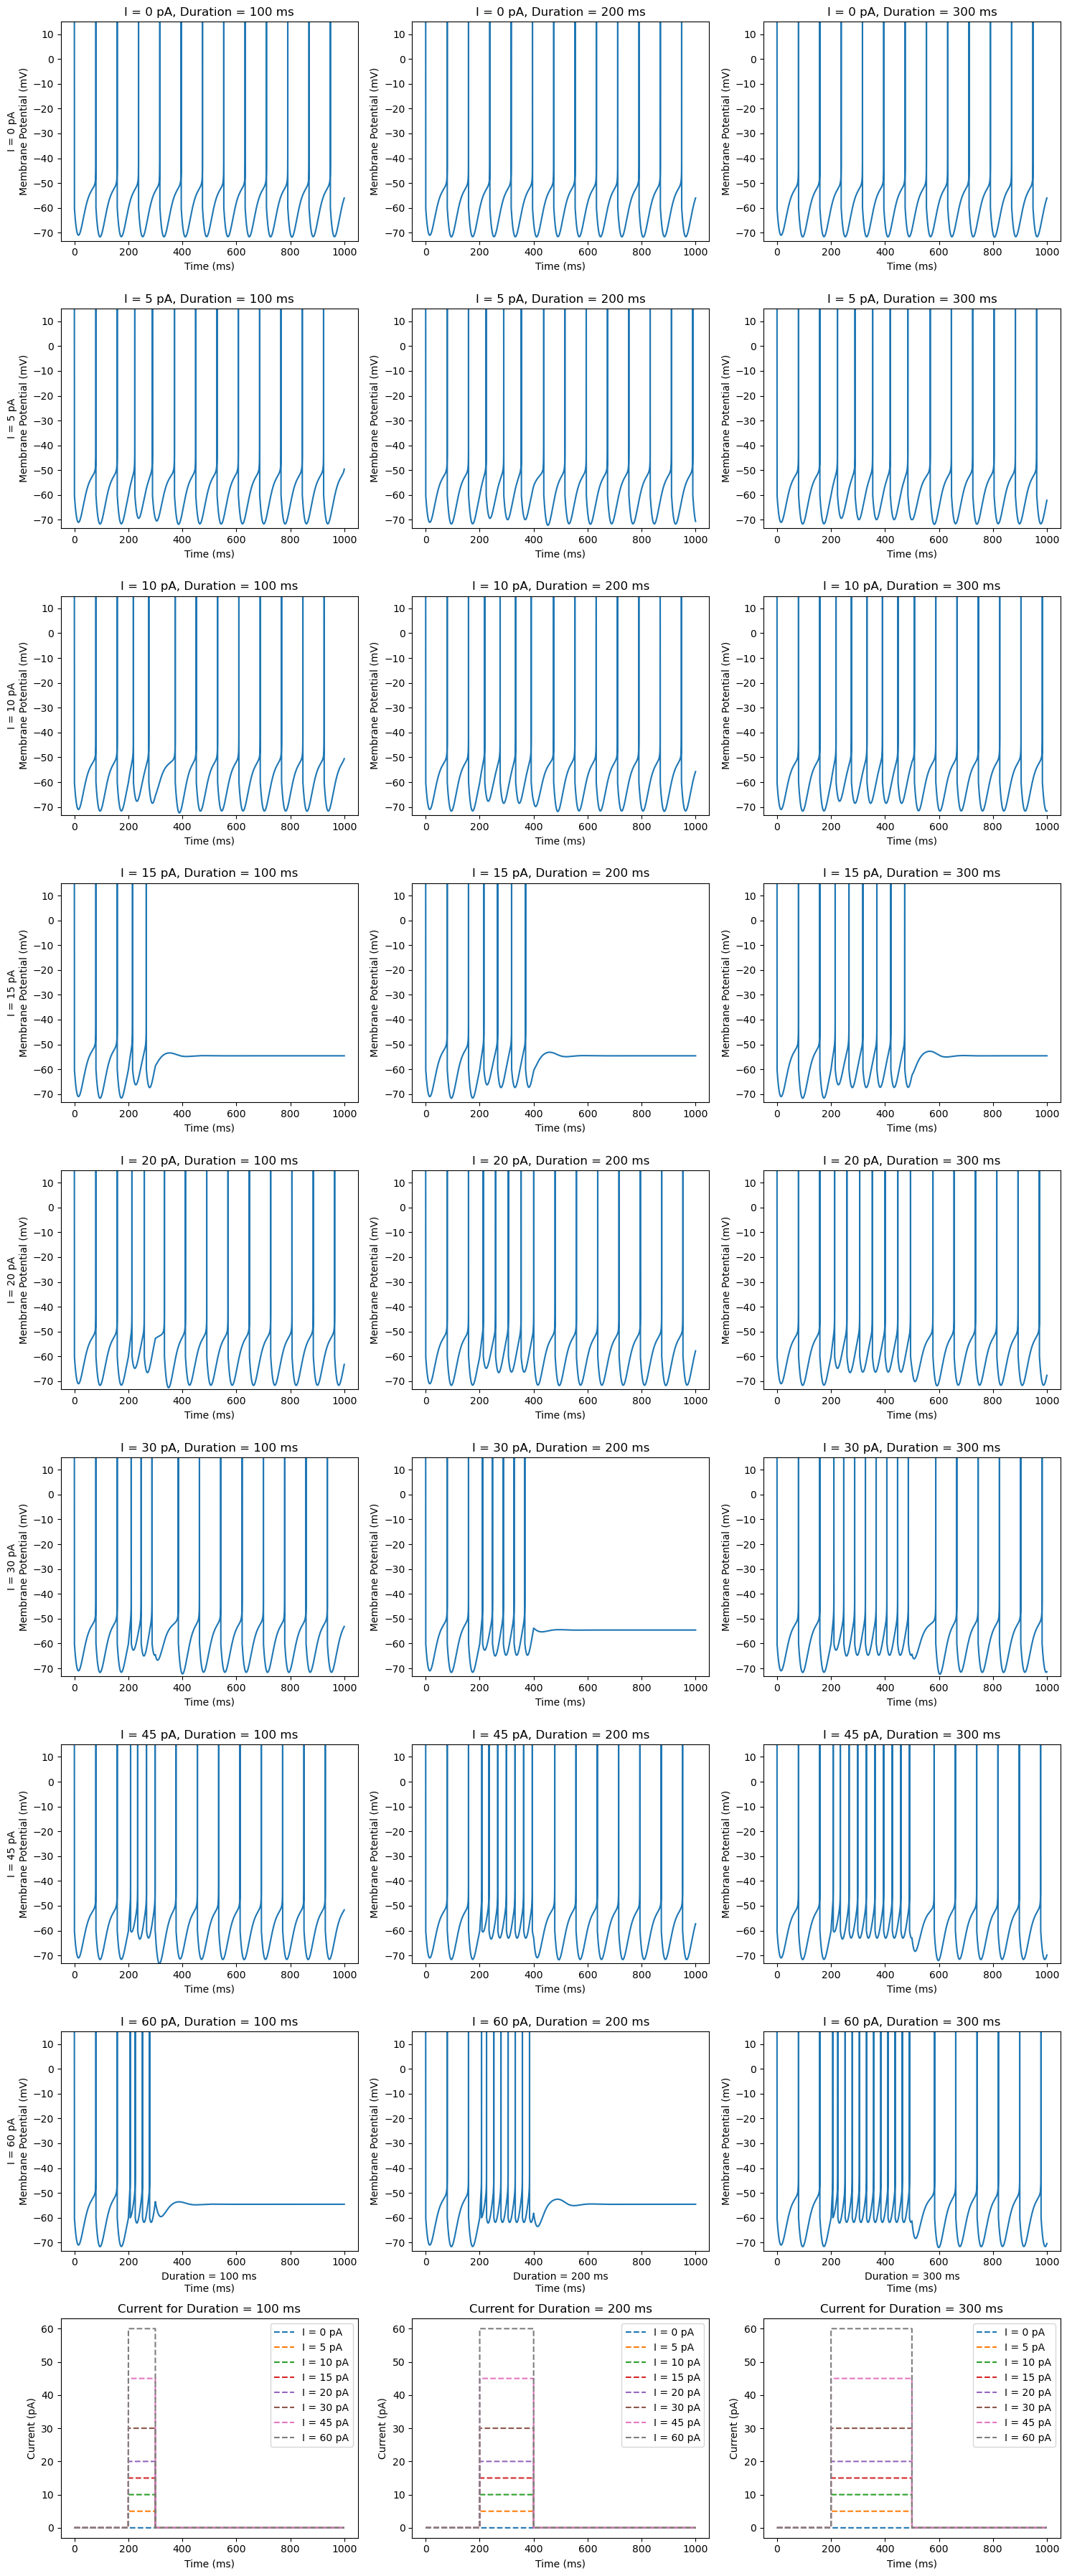

In [2]:
### v: 0mV (with small value I)
json_file = './params_ref/GPe_T1_1.json'  

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value']   
I_values = [0, 5, 10, 15, 20, 30, 45, 60]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

전류 주입 종료 시점의 막전위: -63.65639746568637 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -63.65639746568637 mV, 임계치: -59.0 mV, I: 0. A)
전류 주입 종료 시점의 막전위: -66.84006749142758 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -66.84006749142758 mV, 임계치: -59.0 mV, I: 0. A)
전류 주입 종료 시점의 막전위: -69.06752041640547 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -69.06752041640547 mV, 임계치: -59.0 mV, I: 0. A)


WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 5. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -57.99152451974001 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -57.99152451974001 mV, 임계치: -59.0 mV, I: 5. pA)
전류 주입 종료 시점의 막전위: -56.40135029109127 mV


WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -56.40135029109127 mV, 임계치: -59.0 mV, I: 5. pA)
전류 주입 종료 시점의 막전위: -54.32869871060434 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -54.32869871060434 mV, 임계치: -59.0 mV, I: 5. pA)
전류 주입 종료 시점의 막전위: -62.2997459053612 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -62.2997459053612 mV, 임계치: -59.0 mV, I: 10. pA)
전류 주입 종료 시점의 막전위: -67.37787722813306 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -67.37787722813306 mV, 임계치: -59.0 mV, I: 10. pA)
전류 주입 종료 시점의 막전위: -63.91563872443141 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -63.91563872443141 mV, 임계치: -59.0 mV, I: 10. pA)


WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 15. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -66.52919079641296 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -66.52919079641296 mV, 임계치: -59.0 mV, I: 15. pA)
전류 주입 종료 시점의 막전위: -59.86205920977477 mV


WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 20. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -59.86205920977477 mV, 임계치: -59.0 mV, I: 15. pA)
전류 주입 종료 시점의 막전위: -65.96890525910753 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -65.96890525910753 mV, 임계치: -59.0 mV, I: 15. pA)
전류 주입 종료 시점의 막전위: -63.89813712195581 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -63.89813712195581 mV, 임계치: -59.0 mV, I: 20. pA)
전류 주입 종료 시점의 막전위: -65.04738410083634 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -65.04738410083634 mV, 임계치: -59.0 mV, I: 20. pA)
전류 주입 종료 시점의 막전위: -57.01144824476525 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -57.01144824476525 mV, 임계치: -59.0 mV, I: 20. pA)


WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -60.88493031679597 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -60.88493031679597 mV, 임계치: -59.0 mV, I: 30. pA)
전류 주입 종료 시점의 막전위: -63.268051458179094 mV


WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 45. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -63.268051458179094 mV, 임계치: -59.0 mV, I: 30. pA)
전류 주입 종료 시점의 막전위: -64.49355312073588 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -64.49355312073588 mV, 임계치: -59.0 mV, I: 30. pA)
전류 주입 종료 시점의 막전위: -55.670321591049856 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -55.670321591049856 mV, 임계치: -59.0 mV, I: 45. pA)
전류 주입 종료 시점의 막전위: -59.36672240964756 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -59.36672240964756 mV, 임계치: -59.0 mV, I: 45. pA)
전류 주입 종료 시점의 막전위: -61.9451097827395 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -61.9451097827395 mV, 임계치: -59.0 mV, I: 45. pA)


WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 60. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -57.7339505521338 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -57.7339505521338 mV, 임계치: -59.0 mV, I: 60. pA)
전류 주입 종료 시점의 막전위: -62.204047352738606 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -62.204047352738606 mV, 임계치: -59.0 mV, I: 60. pA)
전류 주입 종료 시점의 막전위: -55.0376592510273 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -55.0376592510273 mV, 임계치: -59.0 mV, I: 60. pA)


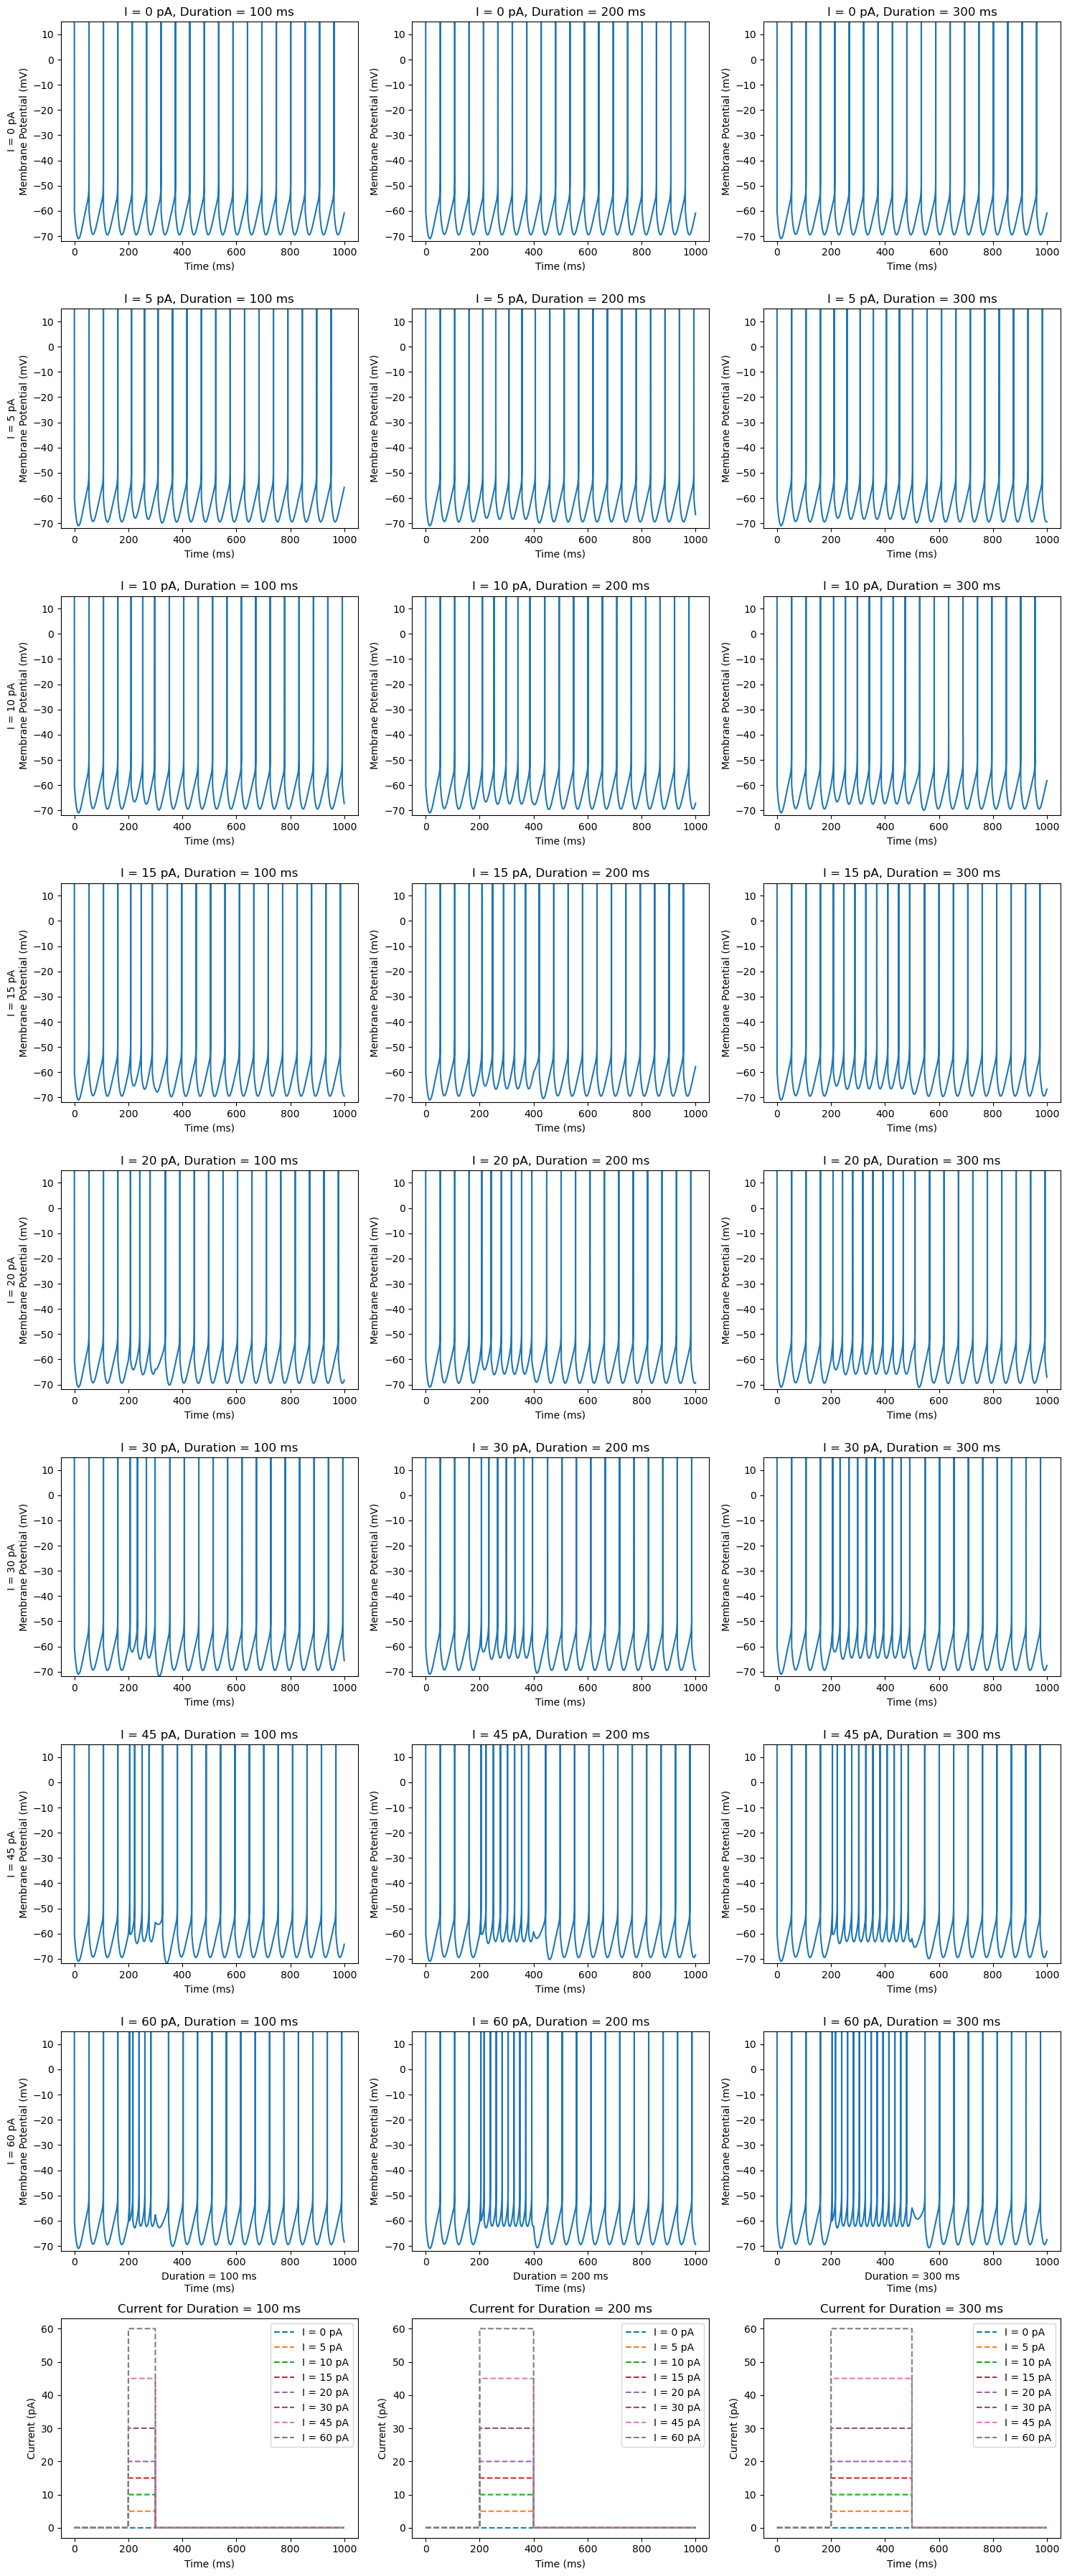

In [3]:
### v: 0mV (with small value I)
json_file = './params_ref/GPe_T1_1t.json'  

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value']   
I_values = [0, 5, 10, 15, 20, 30, 45, 60]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 0. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 0. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
INFO:root:building '_cython_magic_f45ea5186c4fced6382aa29a31f28bac' extension
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -ftree-vectorize -fPIC -fstack-protector-strong -O2 -pipe -fPIE -isystem /opt/anaconda3/envs/brain/include -D_FORTIFY_SOURCE=2 -isystem /opt/anaconda3/envs/brain/include -I/opt/anaconda3/envs/brain/include -I/opt/anaconda3/envs/brain/lib/python3.9

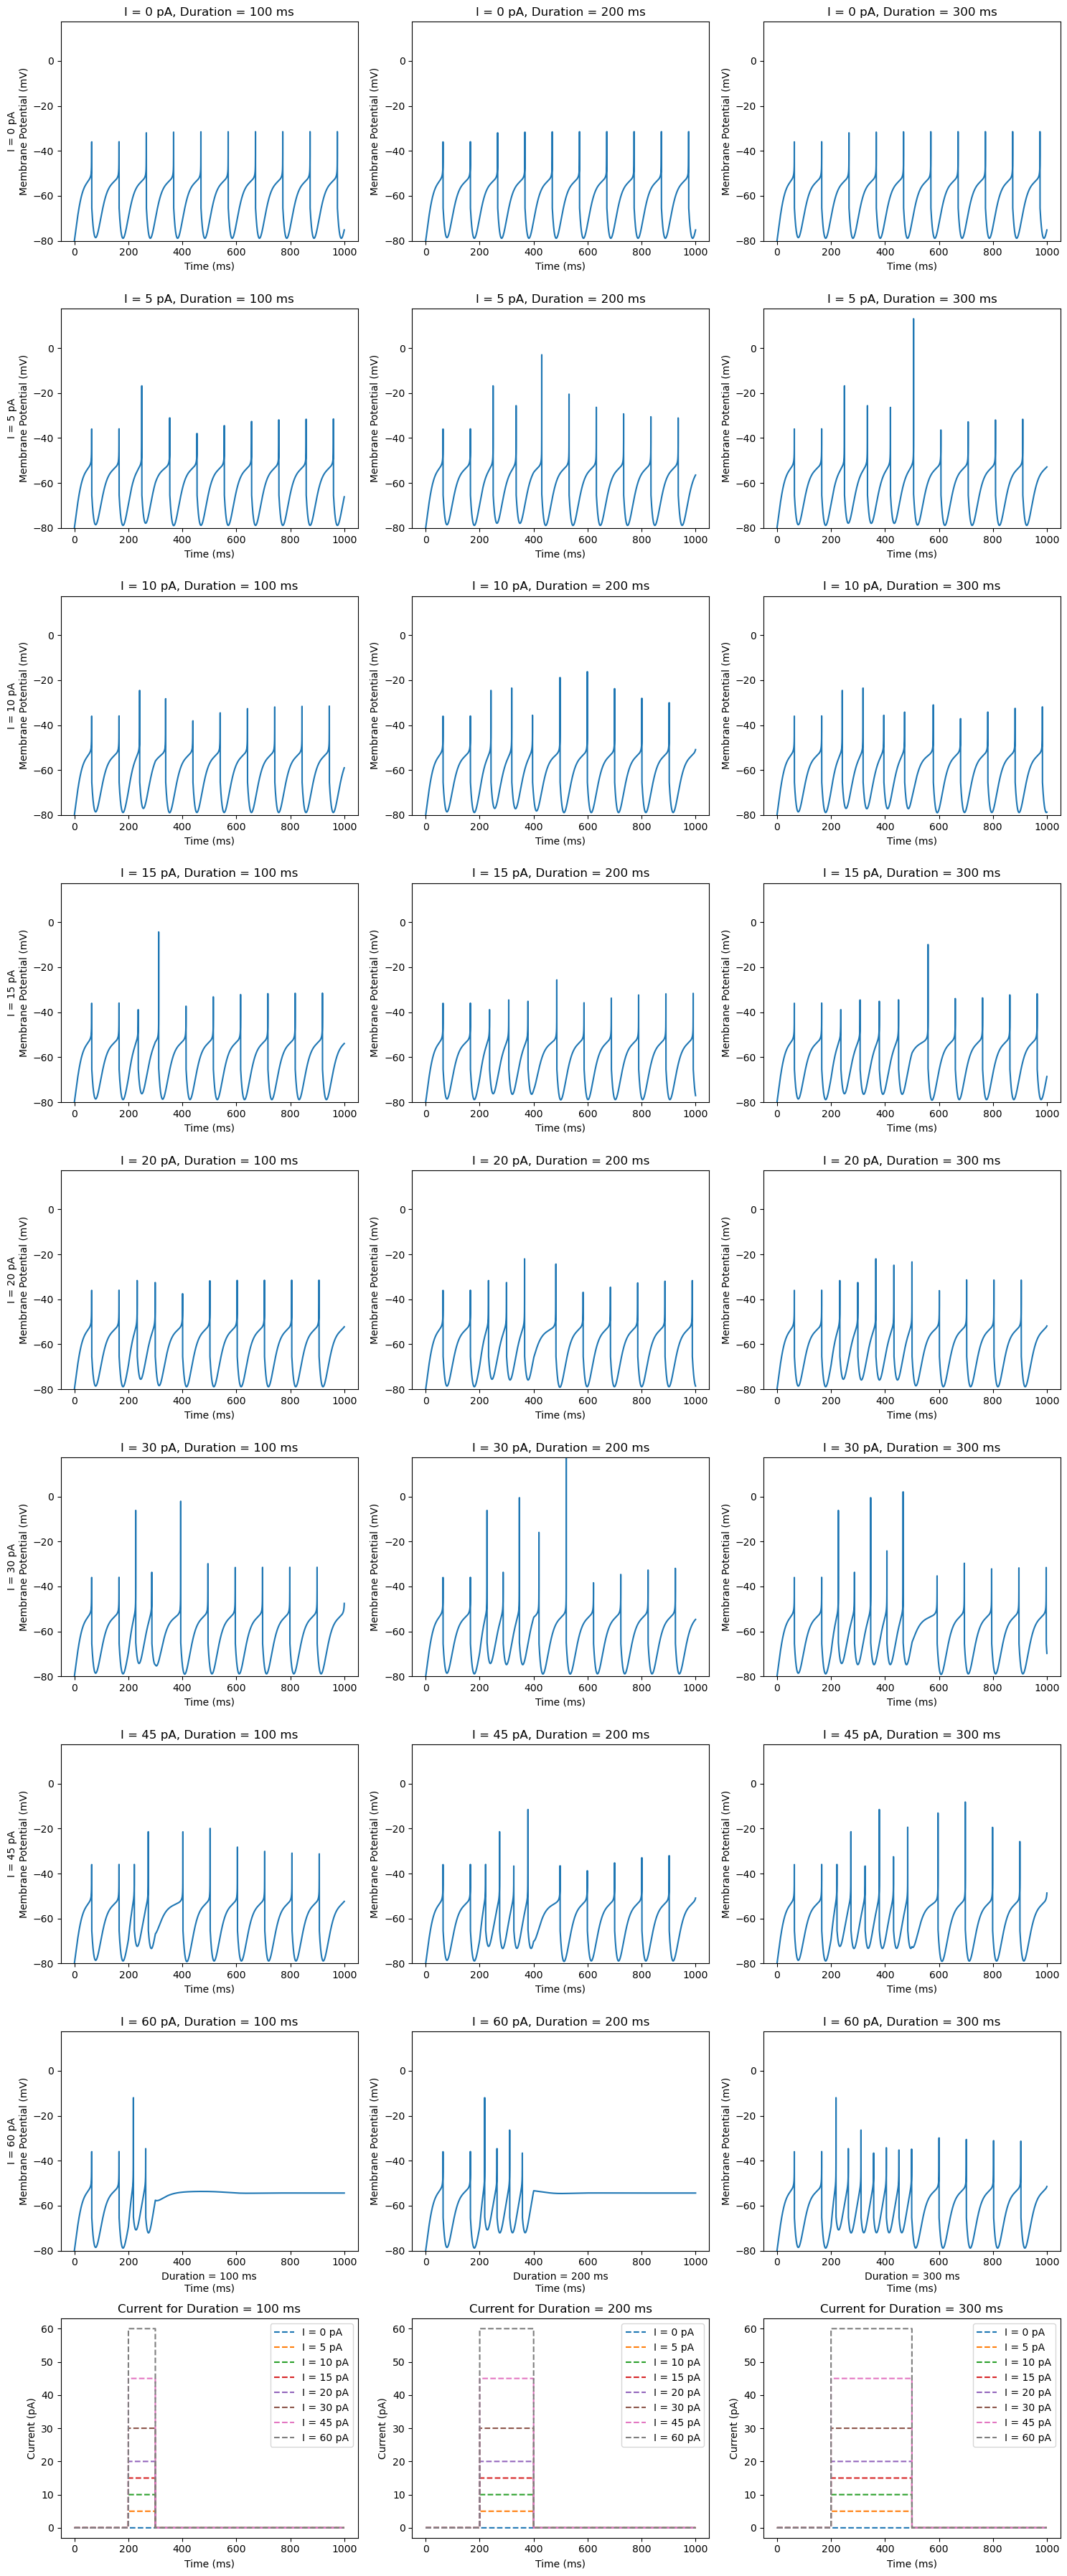

In [7]:
json_file = './params_ref/SNr_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']   
I_values = [0, 5, 10, 15, 20, 30, 45, 60]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value -30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 90. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 90. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 120. The internal variable will b

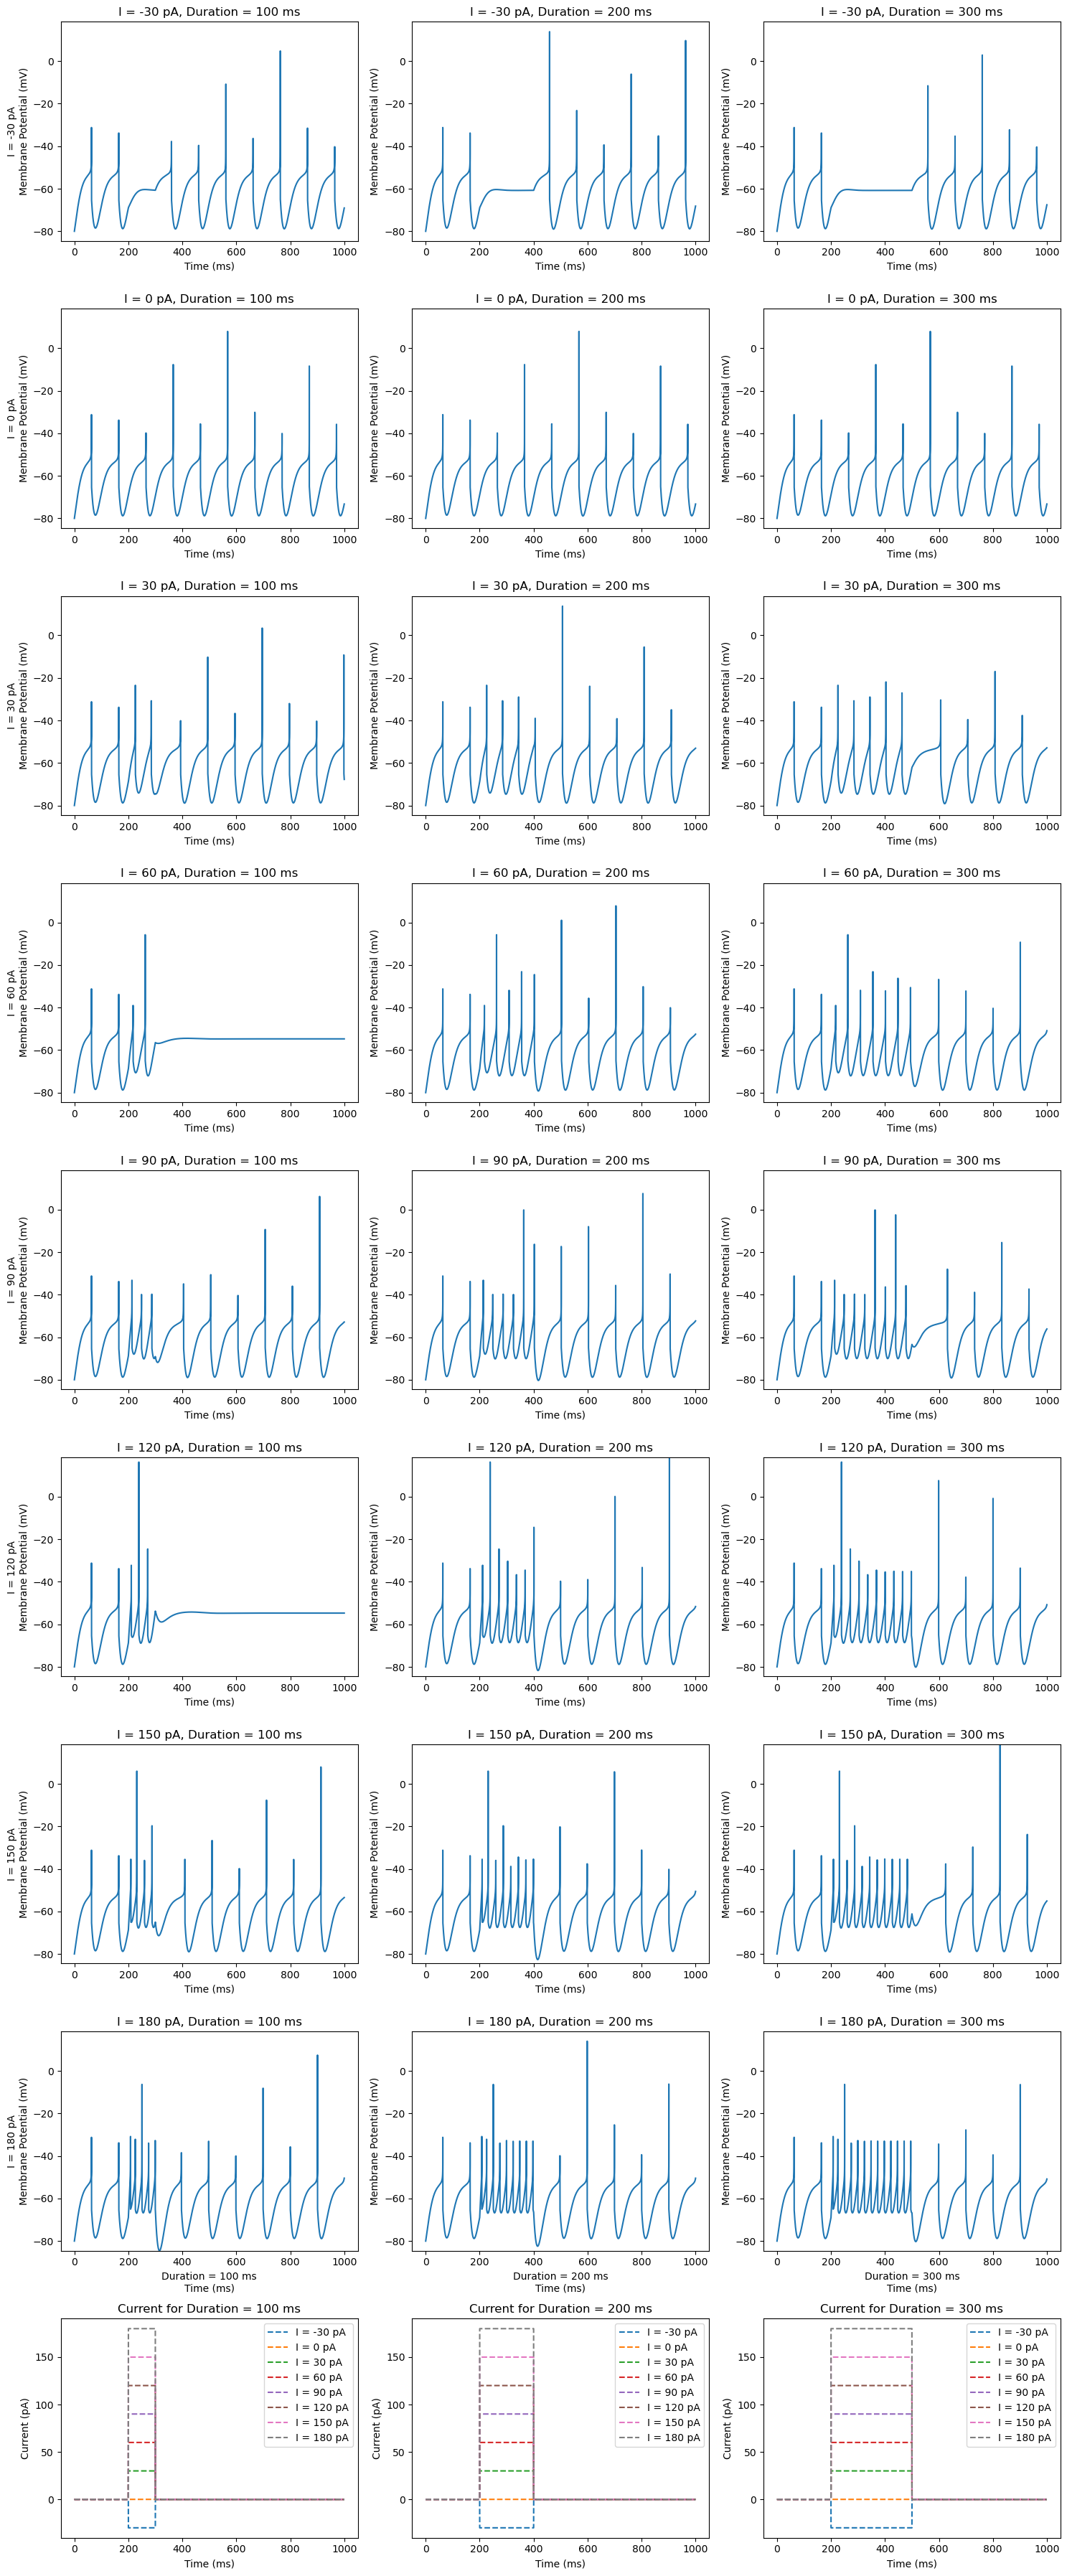

In [9]:
### v: 0mV (with small value I)
json_file = './params_ref/SNr_2.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']   
I_values = [-30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

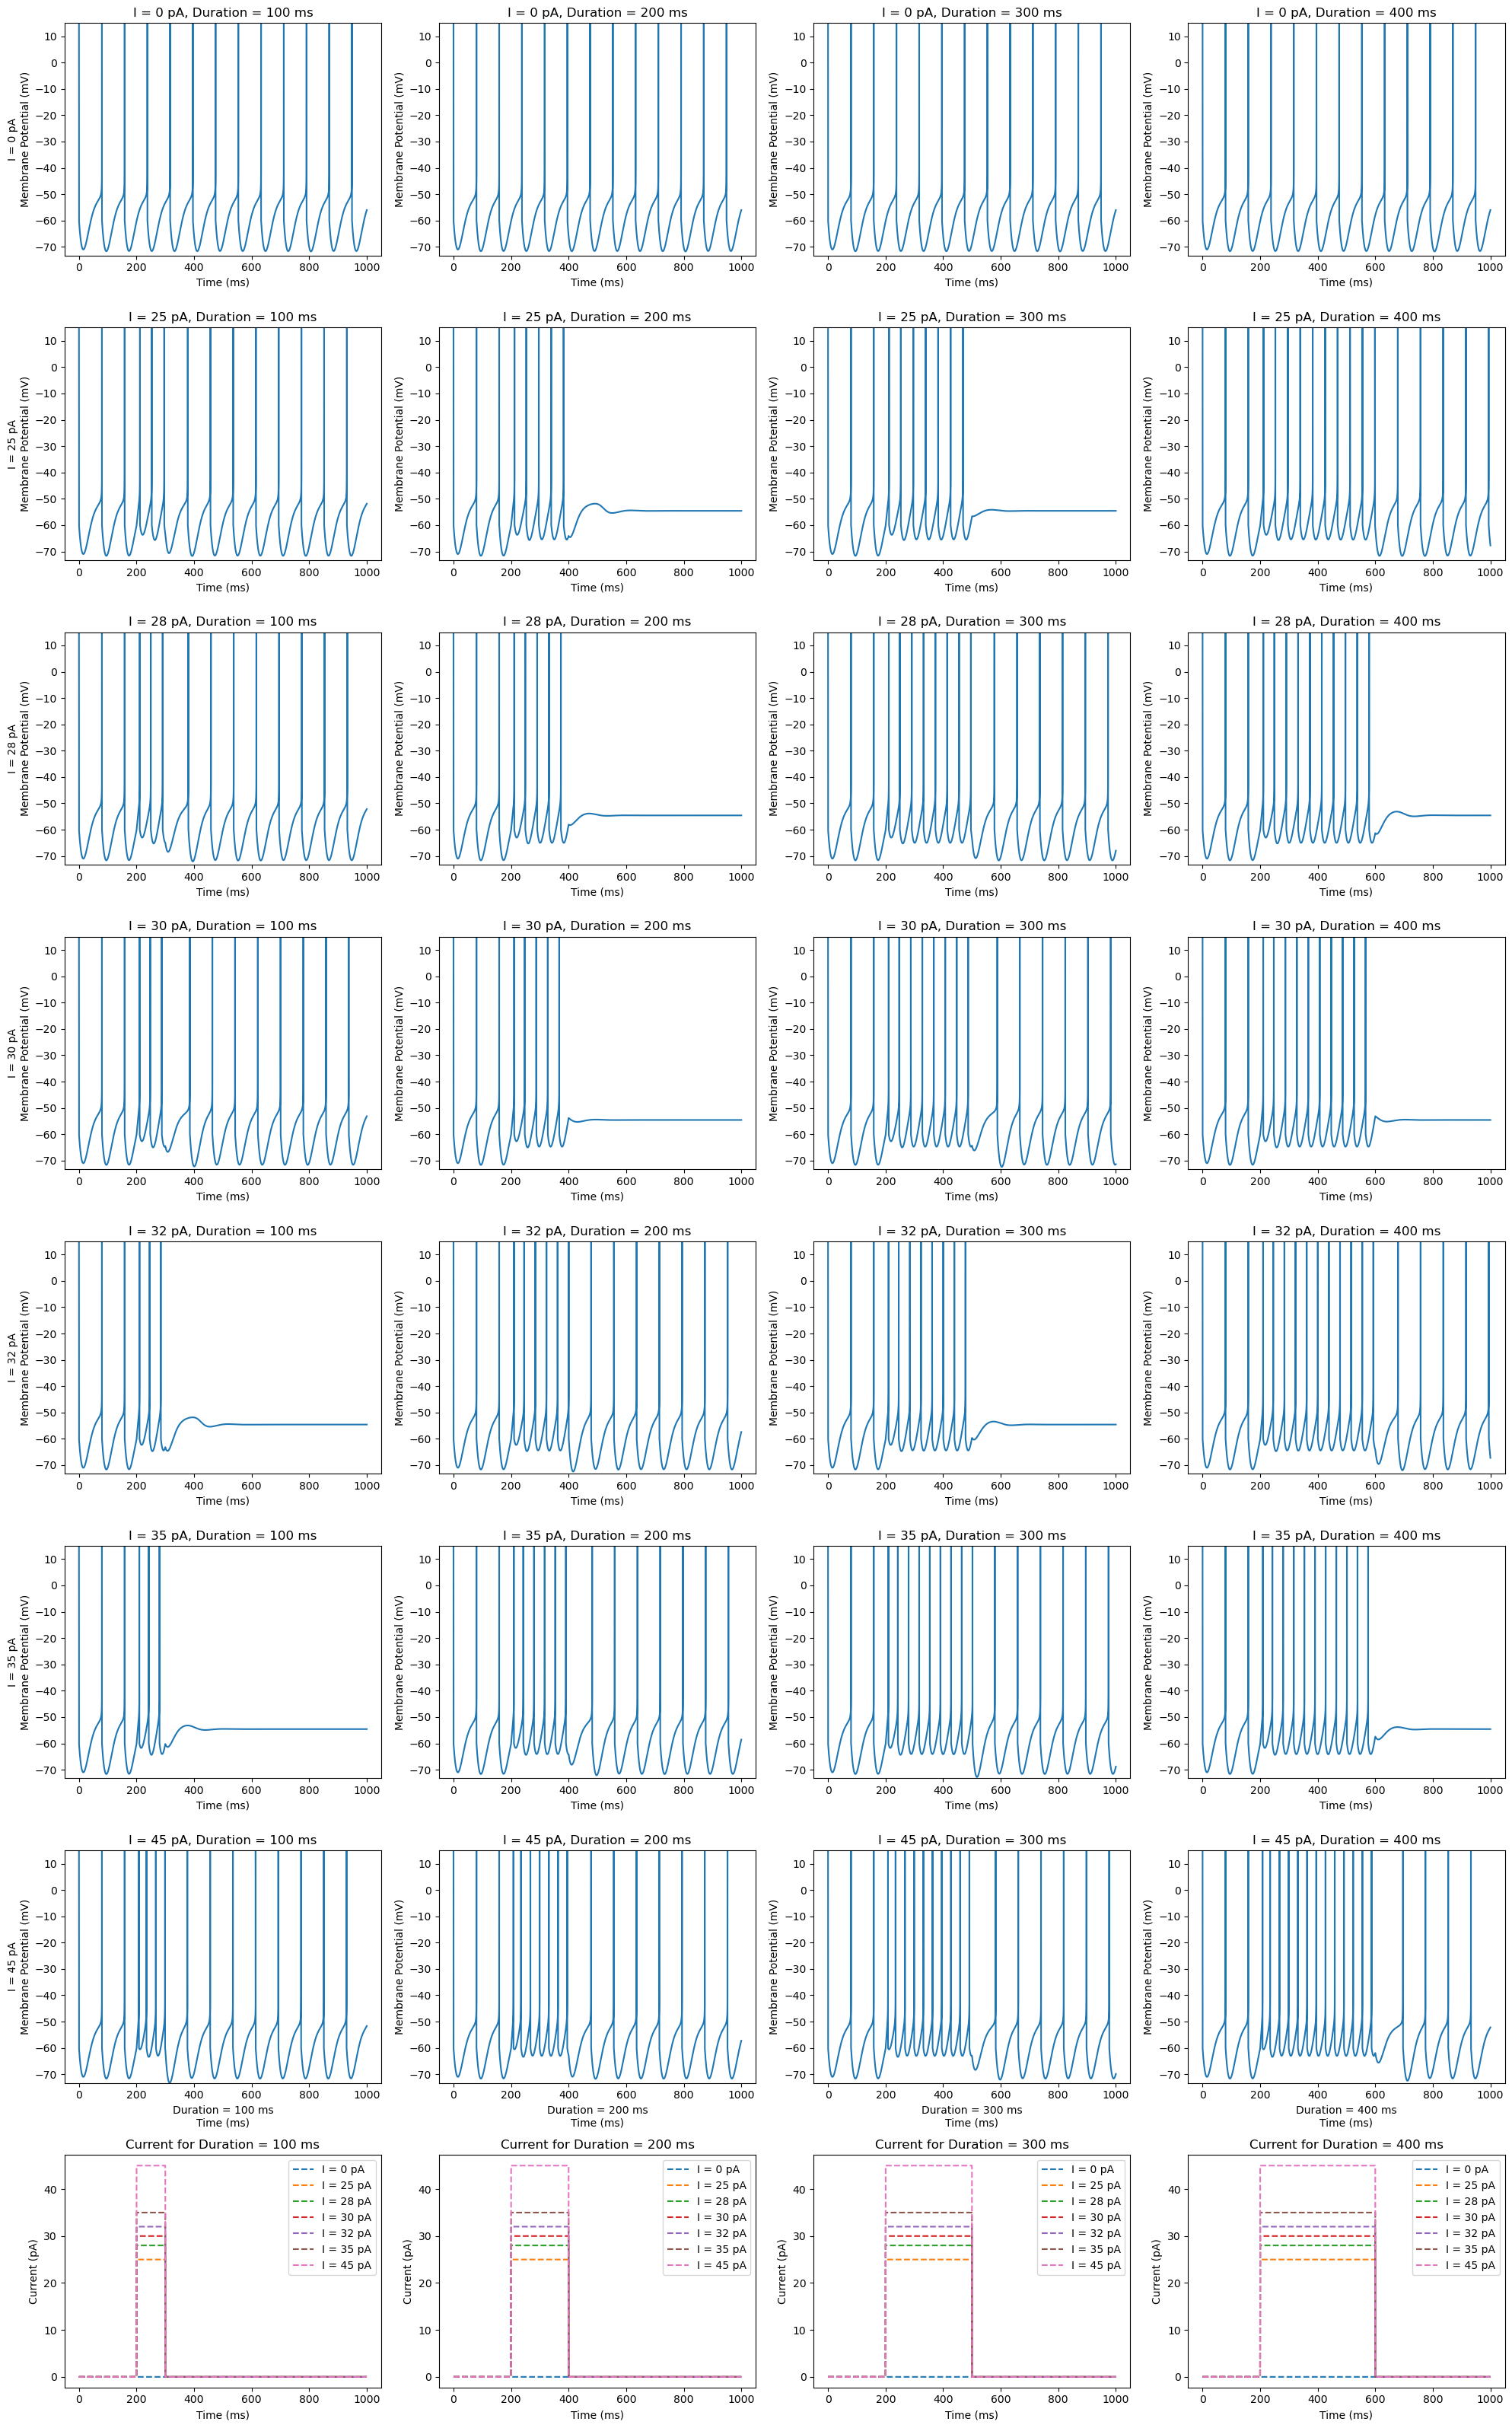

In [5]:
### v: 0mV
json_file = './params_ref/GPe_T1_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [0, 25, 28, 30, 32, 35, 45]
durations = [100, 200, 300, 400]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_03ejpxdc/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_03ejpxdc/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_03ejpxdc/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_03ejpxdc/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_03ejpxdc/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_03ejpxdc/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_03ejpxdc
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

전류 주입 종료 시점의 막전위: -51.06377425478846 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -51.06377425478846 mV, 임계치: -55.2 mV, I: 0. A)
전류 주입 종료 시점의 막전위: -51.482345325490925 mV


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 0. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -51.482345325490925 mV, 임계치: -55.2 mV, I: 0. A)
전류 주입 종료 시점의 막전위: -51.804300558847586 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -51.804300558847586 mV, 임계치: -55.2 mV, I: 0. A)


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 25. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -52.066703437016564 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -52.066703437016564 mV, 임계치: -55.2 mV, I: 0. A)
전류 주입 종료 시점의 막전위: -64.61320708116853 mV


WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 25. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -64.61320708116853 mV, 임계치: -55.2 mV, I: 25. pA)
전류 주입 종료 시점의 막전위: -74.07251644390448 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -74.07251644390448 mV, 임계치: -55.2 mV, I: 25. pA)
전류 주입 종료 시점의 막전위: -58.557183693555665 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -58.557183693555665 mV, 임계치: -55.2 mV, I: 25. pA)
전류 주입 종료 시점의 막전위: -74.10134469479398 mV


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 28. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 28. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -74.10134469479398 mV, 임계치: -55.2 mV, I: 25. pA)
전류 주입 종료 시점의 막전위: -62.82698233196318 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -62.82698233196318 mV, 임계치: -55.2 mV, I: 28. pA)
전류 주입 종료 시점의 막전위: -74.90652640255891 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -74.90652640255891 mV, 임계치: -55.2 mV, I: 28. pA)
전류 주입 종료 시점의 막전위: -54.36682606018824 mV


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -54.36682606018824 mV, 임계치: -55.2 mV, I: 28. pA)
전류 주입 종료 시점의 막전위: -67.0672795019861 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -67.0672795019861 mV, 임계치: -55.2 mV, I: 28. pA)


WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -61.734707438849846 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -61.734707438849846 mV, 임계치: -55.2 mV, I: 30. pA)
전류 주입 종료 시점의 막전위: -73.85762600888148 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -73.85762600888148 mV, 임계치: -55.2 mV, I: 30. pA)
전류 주입 종료 시점의 막전위: -51.10657050573833 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -51.10657050573833 mV, 임계치: -55.2 mV, I: 30. pA)


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 32. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -61.868372604638594 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -61.868372604638594 mV, 임계치: -55.2 mV, I: 30. pA)
전류 주입 종료 시점의 막전위: -60.5876733652251 mV


WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 32. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -60.5876733652251 mV, 임계치: -55.2 mV, I: 32. pA)
전류 주입 종료 시점의 막전위: -71.88824685465346 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -71.88824685465346 mV, 임계치: -55.2 mV, I: 32. pA)
전류 주입 종료 시점의 막전위: -69.63237580821861 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -69.63237580821861 mV, 임계치: -55.2 mV, I: 32. pA)
전류 주입 종료 시점의 막전위: -57.486407135998526 mV


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 35. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 35. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -57.486407135998526 mV, 임계치: -55.2 mV, I: 32. pA)
전류 주입 종료 시점의 막전위: -59.096154631847725 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -59.096154631847725 mV, 임계치: -55.2 mV, I: 35. pA)
전류 주입 종료 시점의 막전위: -68.57755958405448 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -68.57755958405448 mV, 임계치: -55.2 mV, I: 35. pA)
전류 주입 종료 시점의 막전위: -74.17897611723943 mV


WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 45. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -74.17897611723943 mV, 임계치: -55.2 mV, I: 35. pA)
전류 주입 종료 시점의 막전위: -51.68851756935869 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -51.68851756935869 mV, 임계치: -55.2 mV, I: 35. pA)


WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 45. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


전류 주입 종료 시점의 막전위: -54.31955165575396 mV
전류 중단 후 자발적 스파이크 발생 가능성 있음 (막전위: -54.31955165575396 mV, 임계치: -55.2 mV, I: 45. pA)
전류 주입 종료 시점의 막전위: -57.37338032579767 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -57.37338032579767 mV, 임계치: -55.2 mV, I: 45. pA)
전류 주입 종료 시점의 막전위: -60.678096330348424 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -60.678096330348424 mV, 임계치: -55.2 mV, I: 45. pA)
전류 주입 종료 시점의 막전위: -64.23913931731504 mV
전류 중단 후 자발적 스파이크 발생 가능성 낮음 (막전위: -64.23913931731504 mV, 임계치: -55.2 mV, I: 45. pA)


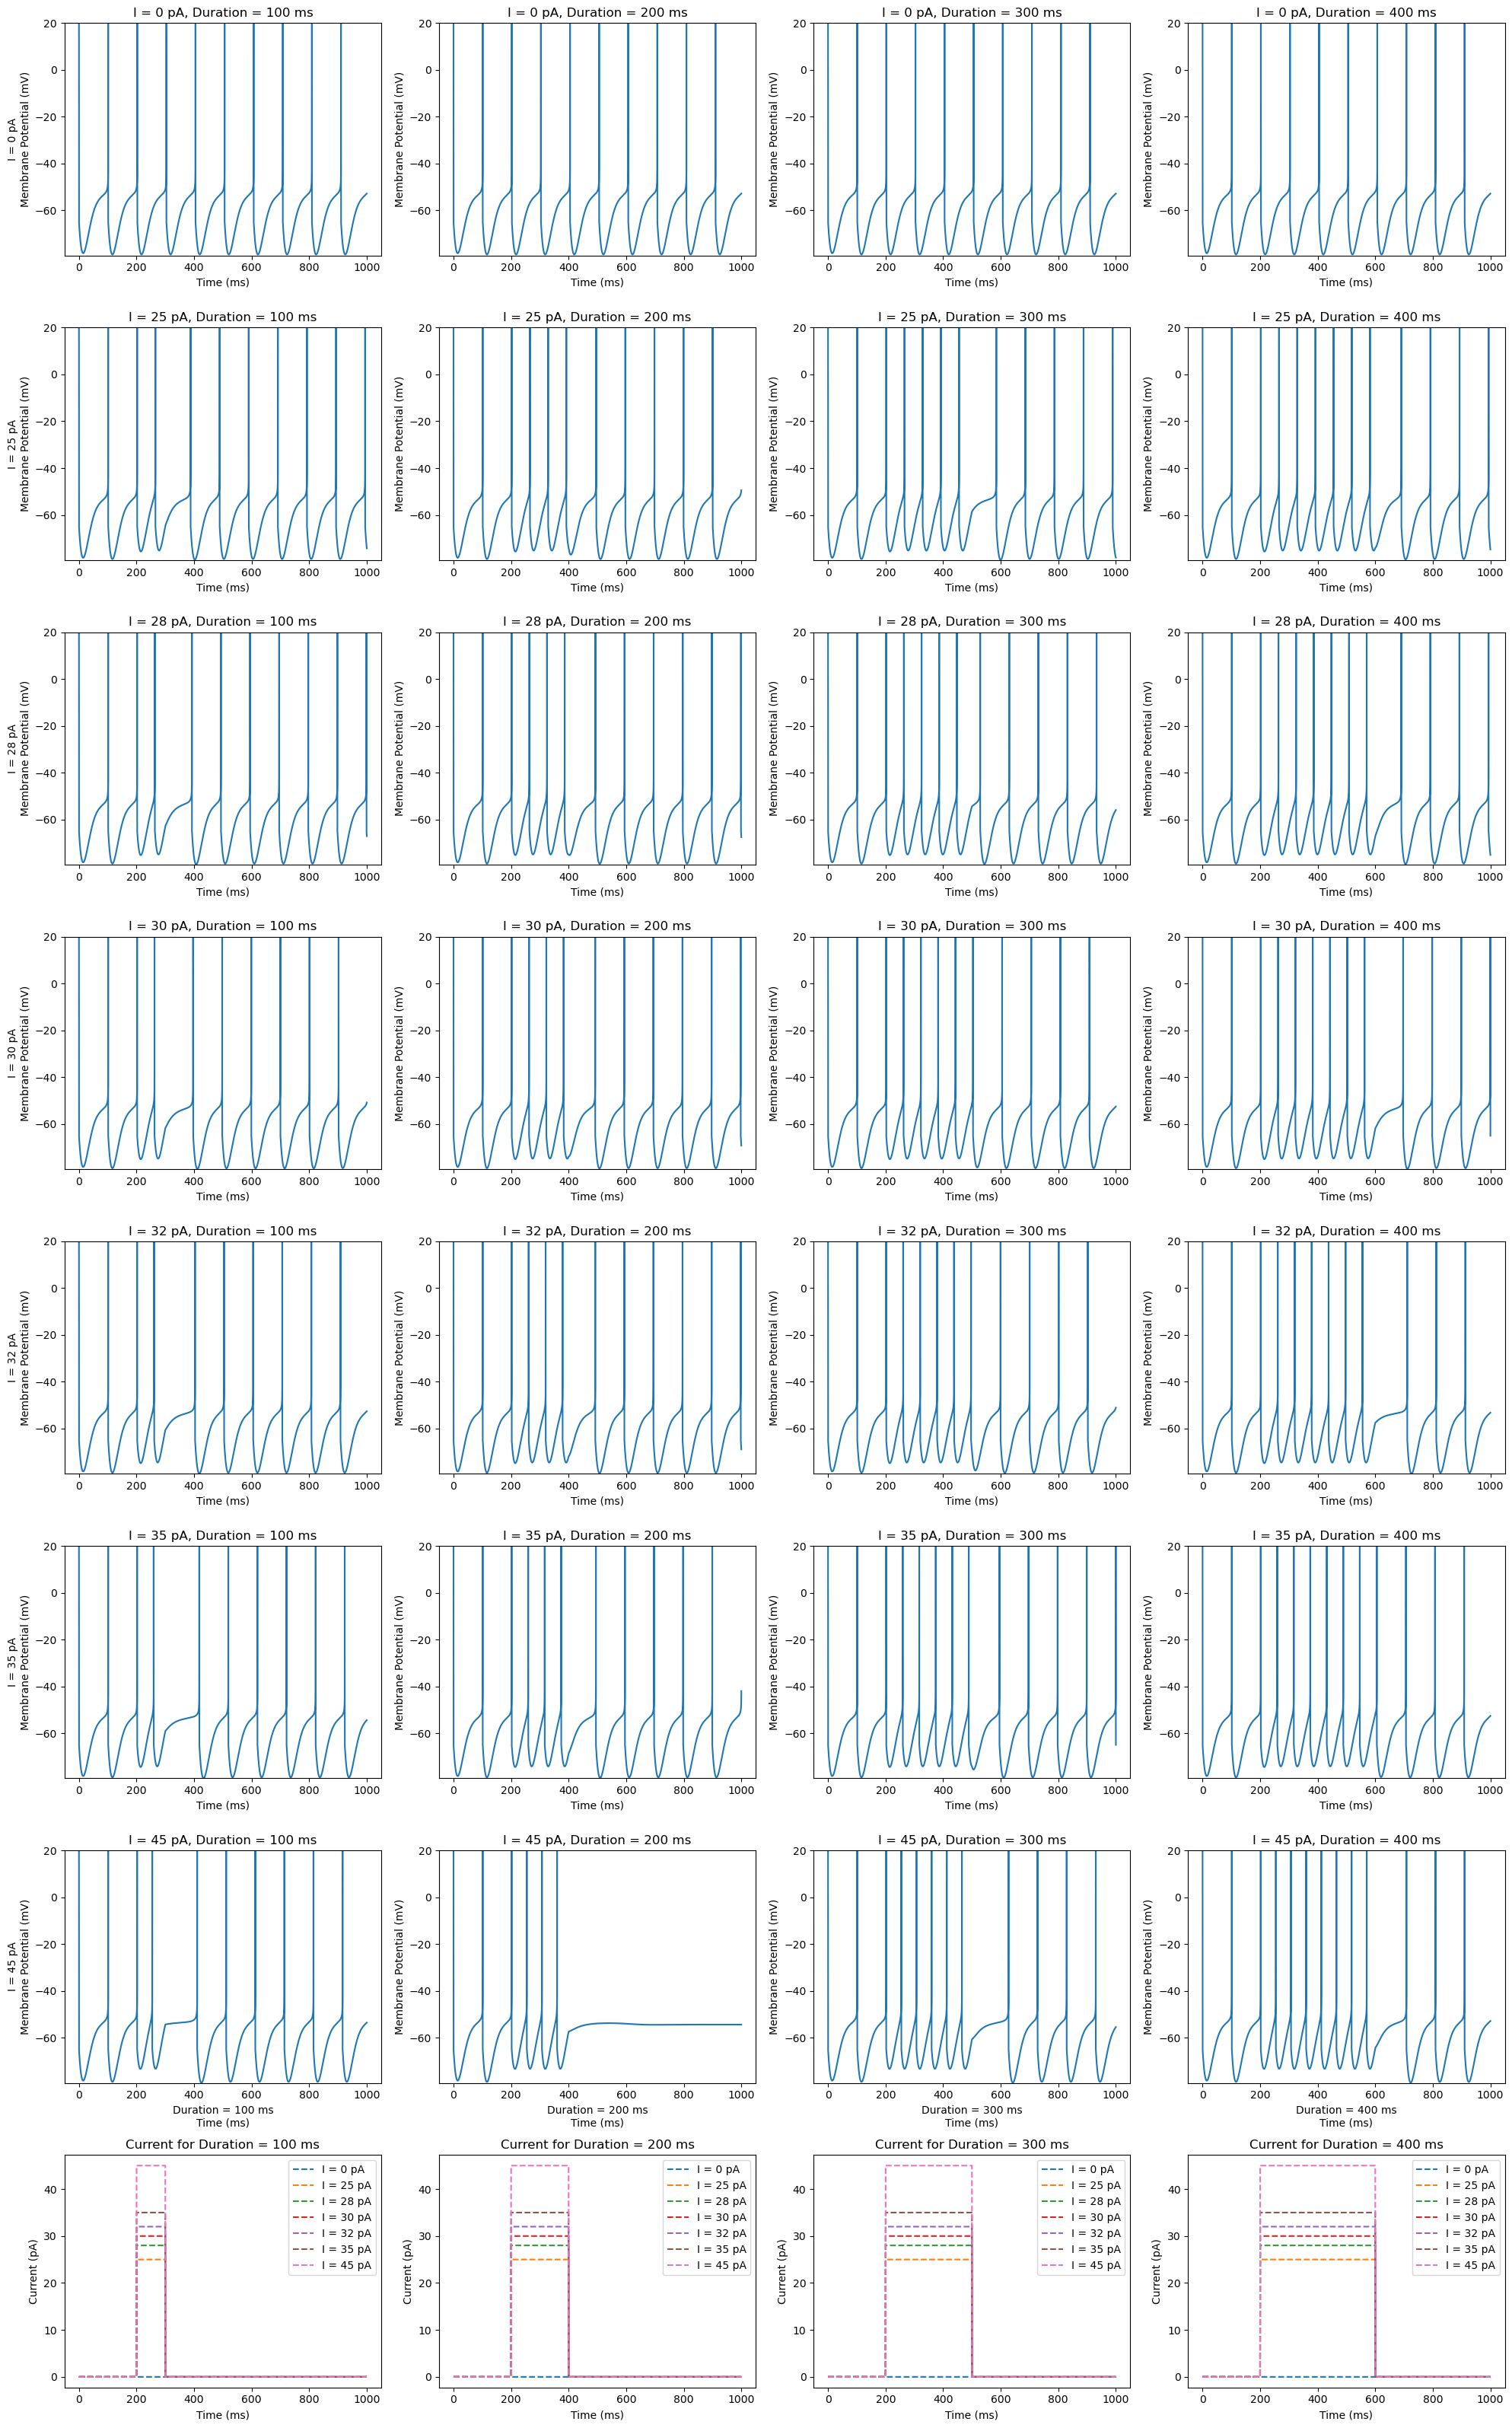

In [2]:
### v: 0mV
json_file = './params_ref/SNr_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [0, 25, 28, 30, 32, 35, 45]
durations = [100, 200, 300, 400]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)